Libraries

In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

Open swingers files

In [5]:
# files available upon request
swingers_bd = pd.read_csv('../../../data/05_swing_voters/swing_voters_bd.csv')
swingers_da = pd.read_csv('../../../data/05_swing_voters/swing_voters_da.csv')
swingers_ba = pd.read_csv('../../../data/05_swing_voters/swing_voters_ba.csv')

# print total
print(f"Number of BD swingers: {len(swingers_bd)}")
print(f"Number of DA swingers: {len(swingers_da)}")
print(f"Number of BA swingers: {len(swingers_ba)}")

Number of BD swingers: 5324
Number of DA swingers: 8303
Number of BA swingers: 3699


Open vulnerability files

In [6]:
# read json, available upon request
with open('../../../data/06_propaganda/tweets_vips_annotated_cleaned.json') as f:
    propaganda_tweets = json.load(f)

#available upon request
with open('../../../data/07_propaganda_vulnerability/propaganda_swingers.json') as f:
    vulnerable_swingers = json.load(f)

Merge with metadata

In [7]:
# count how many tweets are propaganda
propaganda_tweets_count = 0
for tweet in propaganda_tweets:
    if 'annotations' in propaganda_tweets[tweet]:
        propaganda_tweets_count += 1

print(f"Number of propaganda tweets: {propaganda_tweets_count}")

Number of propaganda tweets: 11849


# General swing patterns

In [8]:
start_before = '2022-07-01'
start_during = '2022-08-26'
start_after = '2022-09-25'
end_after = '2022-10-31'

## Before-during

In [9]:
# within the swingers before-during, find those that retweet a propaganda tweet before
bd_vulnerable_before = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="BD" and user[2] < start_during:
            bd_vulnerable_before.append([user[0], tweet])

print(f"Number of BD swingers that retweet propaganda before: {len(bd_vulnerable_before)}")

Number of BD swingers that retweet propaganda before: 6300


In [10]:

bd_vulnerable_during = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="BD" and user[2] >= start_during and user[2] < start_after:
            bd_vulnerable_during.append([user[0], tweet])

print(f"Number of BD swingers that retweet propaganda during: {len(bd_vulnerable_during)}")

Number of BD swingers that retweet propaganda during: 3389


## During-after


In [11]:
da_vulnerable_during = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="DA" and user[2] >= start_during and user[2] < start_after:
            da_vulnerable_during.append([user[0], tweet])

print(f"Number of DA swingers that retweet propaganda during: {len(da_vulnerable_during)}")

Number of DA swingers that retweet propaganda during: 24290


In [12]:
da_vulnerable_after = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="DA" and user[2] >= start_after:
            da_vulnerable_after.append([user[0], tweet])

print(f"Number of DA swingers that retweet propaganda after: {len(da_vulnerable_after)}")

Number of DA swingers that retweet propaganda after: 18582


## Before-after

In [13]:
ba_vulnerable_before = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="BA" and user[2] < start_during:
            ba_vulnerable_before.append([user[0], tweet])

print(f"Number of BA swingers that retweet propaganda before: {len(ba_vulnerable_before)}")

Number of BA swingers that retweet propaganda before: 41332


In [14]:
ba_vulnerable_after = []
for tweet in vulnerable_swingers:
    for user in vulnerable_swingers[tweet]:
        if user[1]=="BA" and user[2] >= start_after:
            ba_vulnerable_after.append([user[0], tweet])

print(f"Number of BA swingers that retweet propaganda after: {len(ba_vulnerable_after)}")

Number of BA swingers that retweet propaganda after: 18419


In general, all swinger groups tend to retweet more propaganda before the swing. The highest ratio is 2.25 times more before the swing in the before-after group.

# Focus on techniques

## Before-during

Which techniques are swingers from before to during more vulnerable to?

In [15]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
bd_vulnerable_before_annotations = []
for user in bd_vulnerable_before:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                bd_vulnerable_before_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [13]:
#bd_vulnerable_before_annotations = [[x[0], list(set(x[1]))] for x in bd_vulnerable_before_annotations]

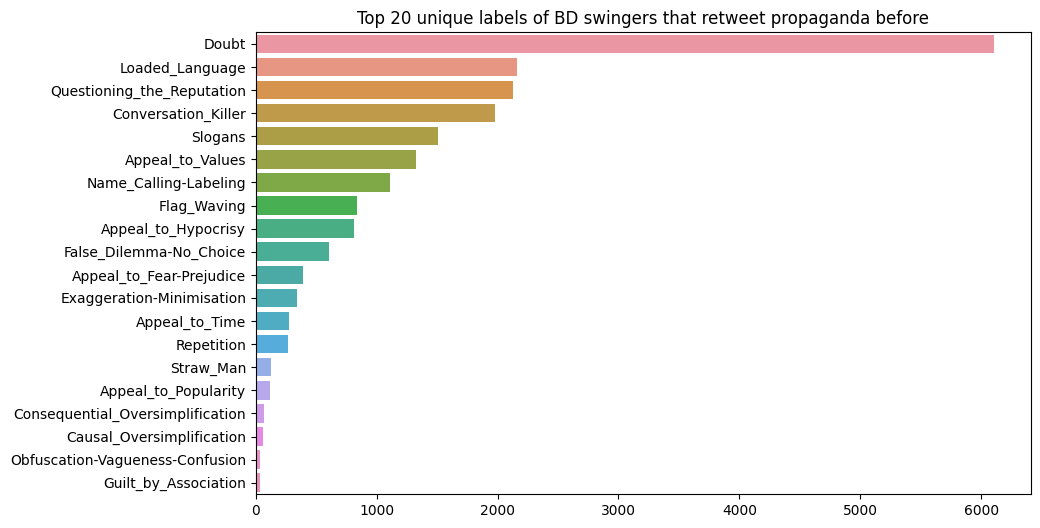

In [16]:
# explode the list of labels and count the occurrences
bd_vulnerable_before_labels = [label for sublist in bd_vulnerable_before_annotations for label in sublist[1]]
bd_vulnerable_before_labels_count = pd.Series(bd_vulnerable_before_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=bd_vulnerable_before_labels_count[:20], y=bd_vulnerable_before_labels_count[:20].index)
plt.title('Top 20 unique labels of BD swingers that retweet propaganda before')
plt.show()

In [17]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
bd_vulnerable_during_annotations = []
for user in bd_vulnerable_during:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                bd_vulnerable_during_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [16]:
#bd_vulnerable_during_annotations = [[x[0], list(set(x[1]))] for x in bd_vulnerable_during_annotations]

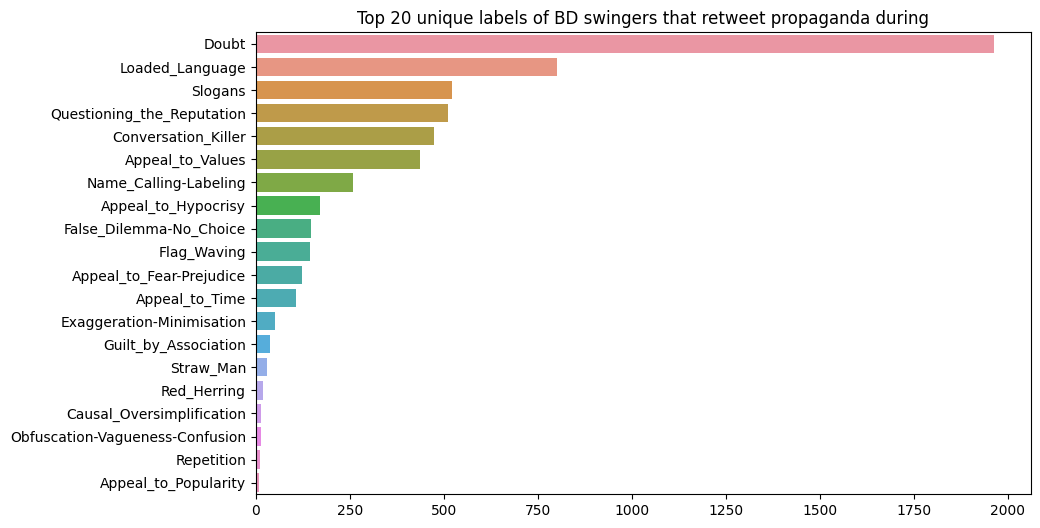

In [18]:
# explode the list of labels and count the occurrences
bd_vulnerable_during_labels = [label for sublist in bd_vulnerable_during_annotations for label in sublist[1]]
bd_vulnerable_during_labels_count = pd.Series(bd_vulnerable_during_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=bd_vulnerable_during_labels_count[:20], y=bd_vulnerable_during_labels_count[:20].index)
plt.title('Top 20 unique labels of BD swingers that retweet propaganda during')
plt.show()

## During-after

In [19]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
da_vulnerable_during_annotations = []
for user in da_vulnerable_during:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                da_vulnerable_during_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [19]:
#da_vulnerable_during_annotations = [[x[0], list(set(x[1]))] for x in da_vulnerable_during_annotations]

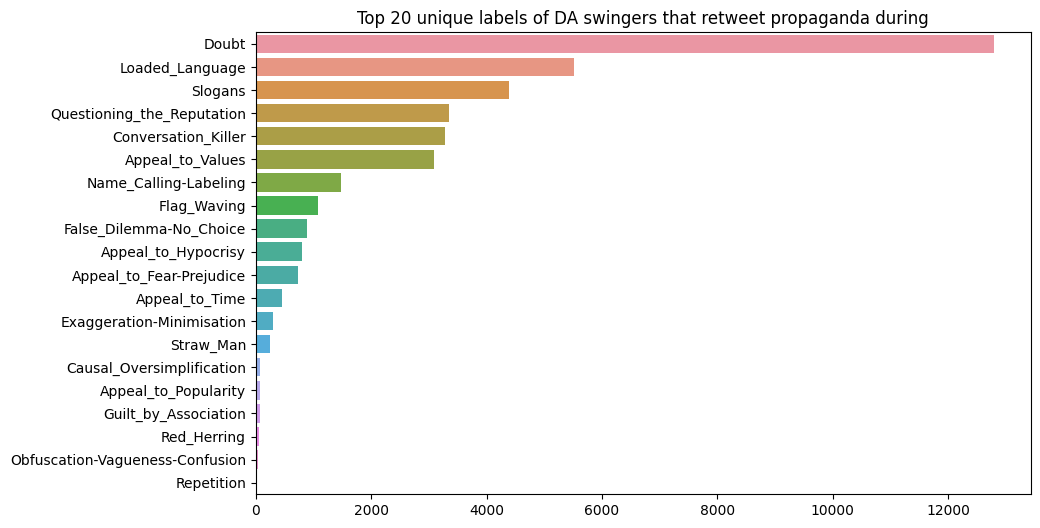

In [20]:
# explode the list of labels and count the occurrences
da_vulnerable_during_labels = [label for sublist in da_vulnerable_during_annotations for label in sublist[1]]
da_vulnerable_during_labels_count = pd.Series(da_vulnerable_during_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=da_vulnerable_during_labels_count[:20], y=da_vulnerable_during_labels_count[:20].index)
plt.title('Top 20 unique labels of DA swingers that retweet propaganda during')
plt.show()

In [21]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
da_vulnerable_after_annotations = []
for user in da_vulnerable_after:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                da_vulnerable_after_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [22]:
#da_vulnerable_after_annotations = [[x[0], list(set(x[1]))] for x in da_vulnerable_after_annotations]

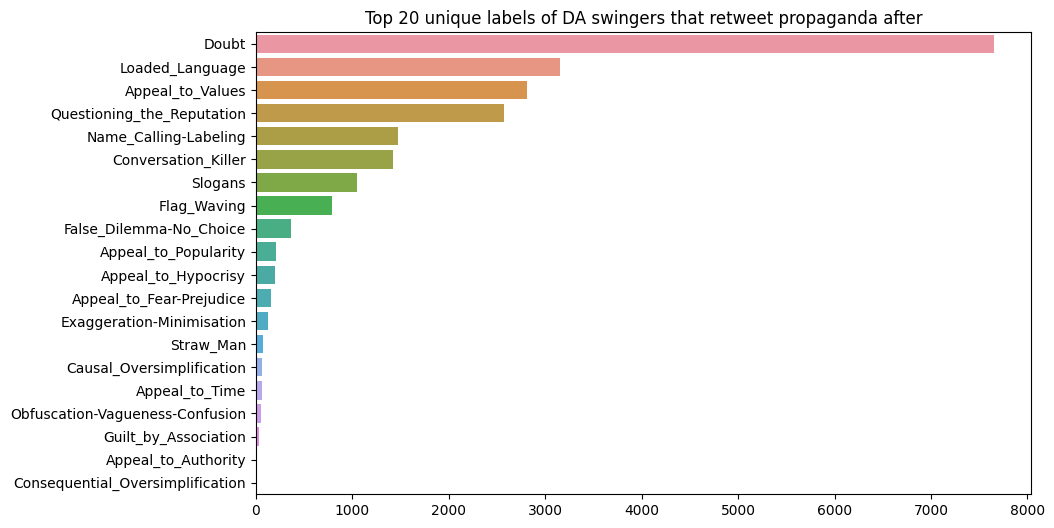

In [22]:
# explode the list of labels and count the occurrences
da_vulnerable_after_labels = [label for sublist in da_vulnerable_after_annotations for label in sublist[1]]
da_vulnerable_after_labels_count = pd.Series(da_vulnerable_after_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=da_vulnerable_after_labels_count[:20], y=da_vulnerable_after_labels_count[:20].index)
plt.title('Top 20 unique labels of DA swingers that retweet propaganda after')
plt.show()

## Before-after

In [23]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
ba_vulnerable_before_annotations = []
for user in ba_vulnerable_before:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                ba_vulnerable_before_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [25]:
#ba_vulnerable_before_annotations = [[x[0], list(set(x[1]))] for x in ba_vulnerable_before_annotations]

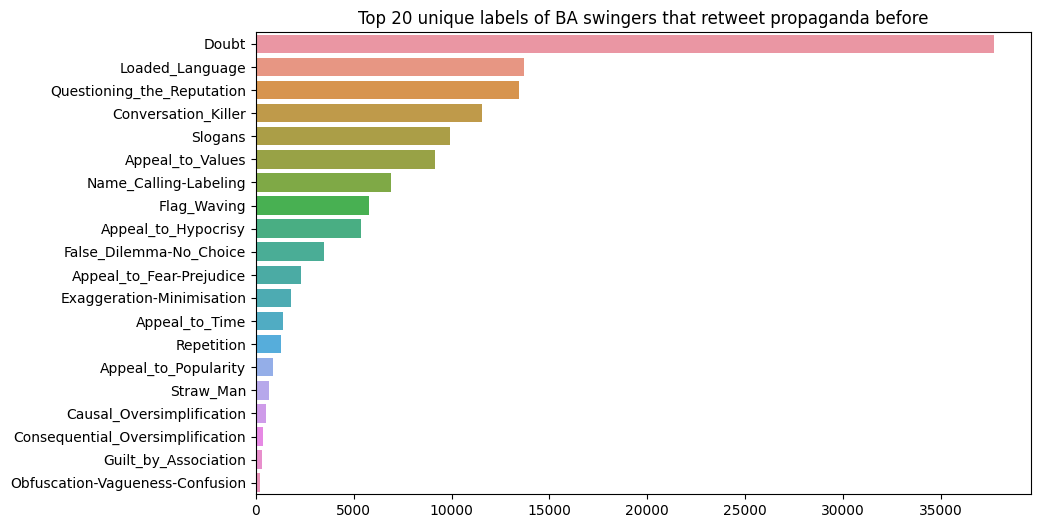

In [24]:
# explode the list of labels and count the occurrences
ba_vulnerable_before_labels = [label for sublist in ba_vulnerable_before_annotations for label in sublist[1]]
ba_vulnerable_before_labels_count = pd.Series(ba_vulnerable_before_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=ba_vulnerable_before_labels_count[:20], y=ba_vulnerable_before_labels_count[:20].index)
plt.title('Top 20 unique labels of BA swingers that retweet propaganda before')
plt.show()

In [25]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
ba_vulnerable_after_annotations = []
for user in ba_vulnerable_after:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                ba_vulnerable_after_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [28]:
#ba_vulnerable_after_annotations = [[x[0], list(set(x[1]))] for x in ba_vulnerable_after_annotations]

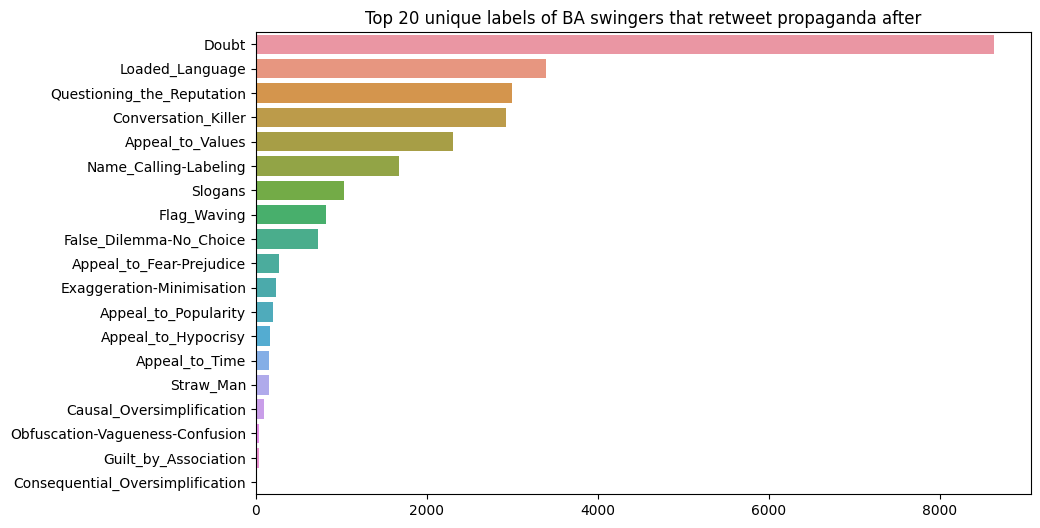

In [26]:
# explode the list of labels and count the occurrences
ba_vulnerable_after_labels = [label for sublist in ba_vulnerable_after_annotations for label in sublist[1]]
ba_vulnerable_after_labels_count = pd.Series(ba_vulnerable_after_labels).value_counts()

# plot top 20 unique labels
plt.figure(figsize=(10, 6))
sns.barplot(x=ba_vulnerable_after_labels_count[:20], y=ba_vulnerable_after_labels_count[:20].index)
plt.title('Top 20 unique labels of BA swingers that retweet propaganda after')
plt.show()

# Focus on specific types of swingers

In [27]:
norealswing = pd.read_csv('../../../data/05_swing_voters/categories/no_real_swing_voters.csv')
nantoparty = pd.read_csv('../../../data/05_swing_voters/categories/nan_to_party.csv')
partytonan = pd.read_csv('../../../data/05_swing_voters/categories/party_to_nan.csv')
soft_swing = pd.read_csv('../../../data/05_swing_voters/categories/soft_swing_voters.csv')
hard_swing = pd.read_csv('../../../data/05_swing_voters/categories/hard_swing_voters.csv')

## Hard swing

### Before-during

In [28]:
swingtype = hard_swing
swingers_data = swingers_bd
pre = "Before"
post = "During"
groupname = "hard swingers"

In [29]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [30]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 576


In [31]:
swingers_swingtype["pattern"].value_counts()

FdI->PD                108
L;Az-Iv->AVS;PD        100
AVS;PD->Az-Iv           76
AVS;PD->M5s;FdI         64
M5s->AVS;PD             61
FdI->AVS;PD             39
M5s->PD                 34
FdI->Az-Iv              32
L;FdI->Az-Iv            20
L;FdI->PD               15
L;Az-Iv->PD             13
M5s->FI;L;PD;FdI;NM      8
L;FdI->AVS;PD            4
FI->PD                   1
FI->Az-Iv                1
Name: pattern, dtype: int64

In [32]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


In [33]:
len(swingers_swingtype["user"].values)

576

Most retweeted techniques, comparison before and during

In [34]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [35]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [36]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 55


In [37]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 77
Unique number of vulnerable users post: 68


In [38]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [42]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [39]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [44]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

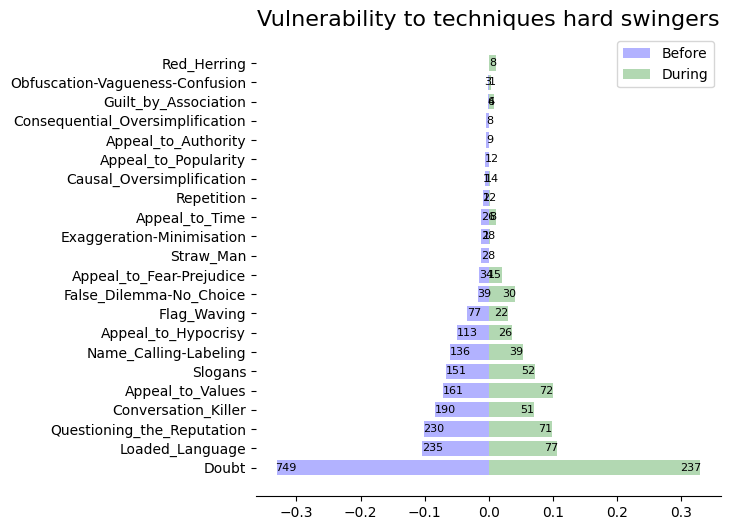

In [40]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.3, label=pre)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.3, label=post)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=8)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=8)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [41]:
swingtype = hard_swing
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "hard swingers"

In [42]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [43]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 622


In [44]:
swingers_swingtype["pattern"].value_counts()

PD->Az-Iv;FdI          200
Az-Iv->AVS;PD          128
AVS;PD->Az-Iv;FdI       94
M5s;FdI->AVS;PD         88
AVS;PD->M5s             50
Az-Iv->FI;FdI           10
PD->M5s                  9
Az-Iv->L;FdI             9
PD->L;FdI                8
PD->FI;FdI               7
AVS;PD->FI;FdI           6
AVS;PD->L;FdI            5
M5s;FdI->PD;Az-Iv        4
FI;L;PD;FdI;NM->M5s      1
AVS;PD->NM;FdI           1
AVS;PD->FdI              1
Az-Iv->M5s               1
Name: pattern, dtype: int64

In [45]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [46]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [47]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [48]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 123


In [49]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 172
Unique number of vulnerable users post: 180


In [50]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [56]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [51]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [58]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

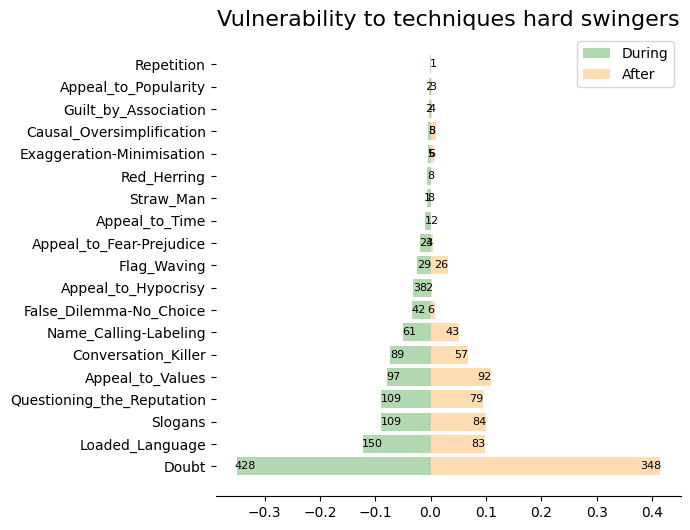

In [52]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.3, label=pre)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.3, label=post)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=8)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=8)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### Before-after

In [53]:
swingtype = hard_swing
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "hard swingers"

In [54]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [55]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 510


In [56]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->AVS;PD      85
M5s->Az-Iv;FdI       81
M5s->AVS;PD          81
FdI->AVS;PD          76
AVS;PD->Az-Iv;FdI    52
AVS;PD->M5s          52
FdI->PD;Az-Iv        18
L;FdI->PD;Az-Iv      16
FdI->M5s             14
M5s->L;FdI           13
L;FdI->AVS;PD         8
M5s->FI;FdI           4
AVS;PD->NM;FdI        2
L;Az-Iv->M5s          2
AVS;PD->L;FdI         2
M5s->NM;FdI           1
M5s->PD;Az-Iv         1
AVS;PD->FI;FdI        1
FI->PD;Az-Iv          1
Name: pattern, dtype: int64

In [57]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [58]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [59]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [60]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 199


In [61]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 307
Unique number of vulnerable users post: 231


In [62]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [70]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [63]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [72]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

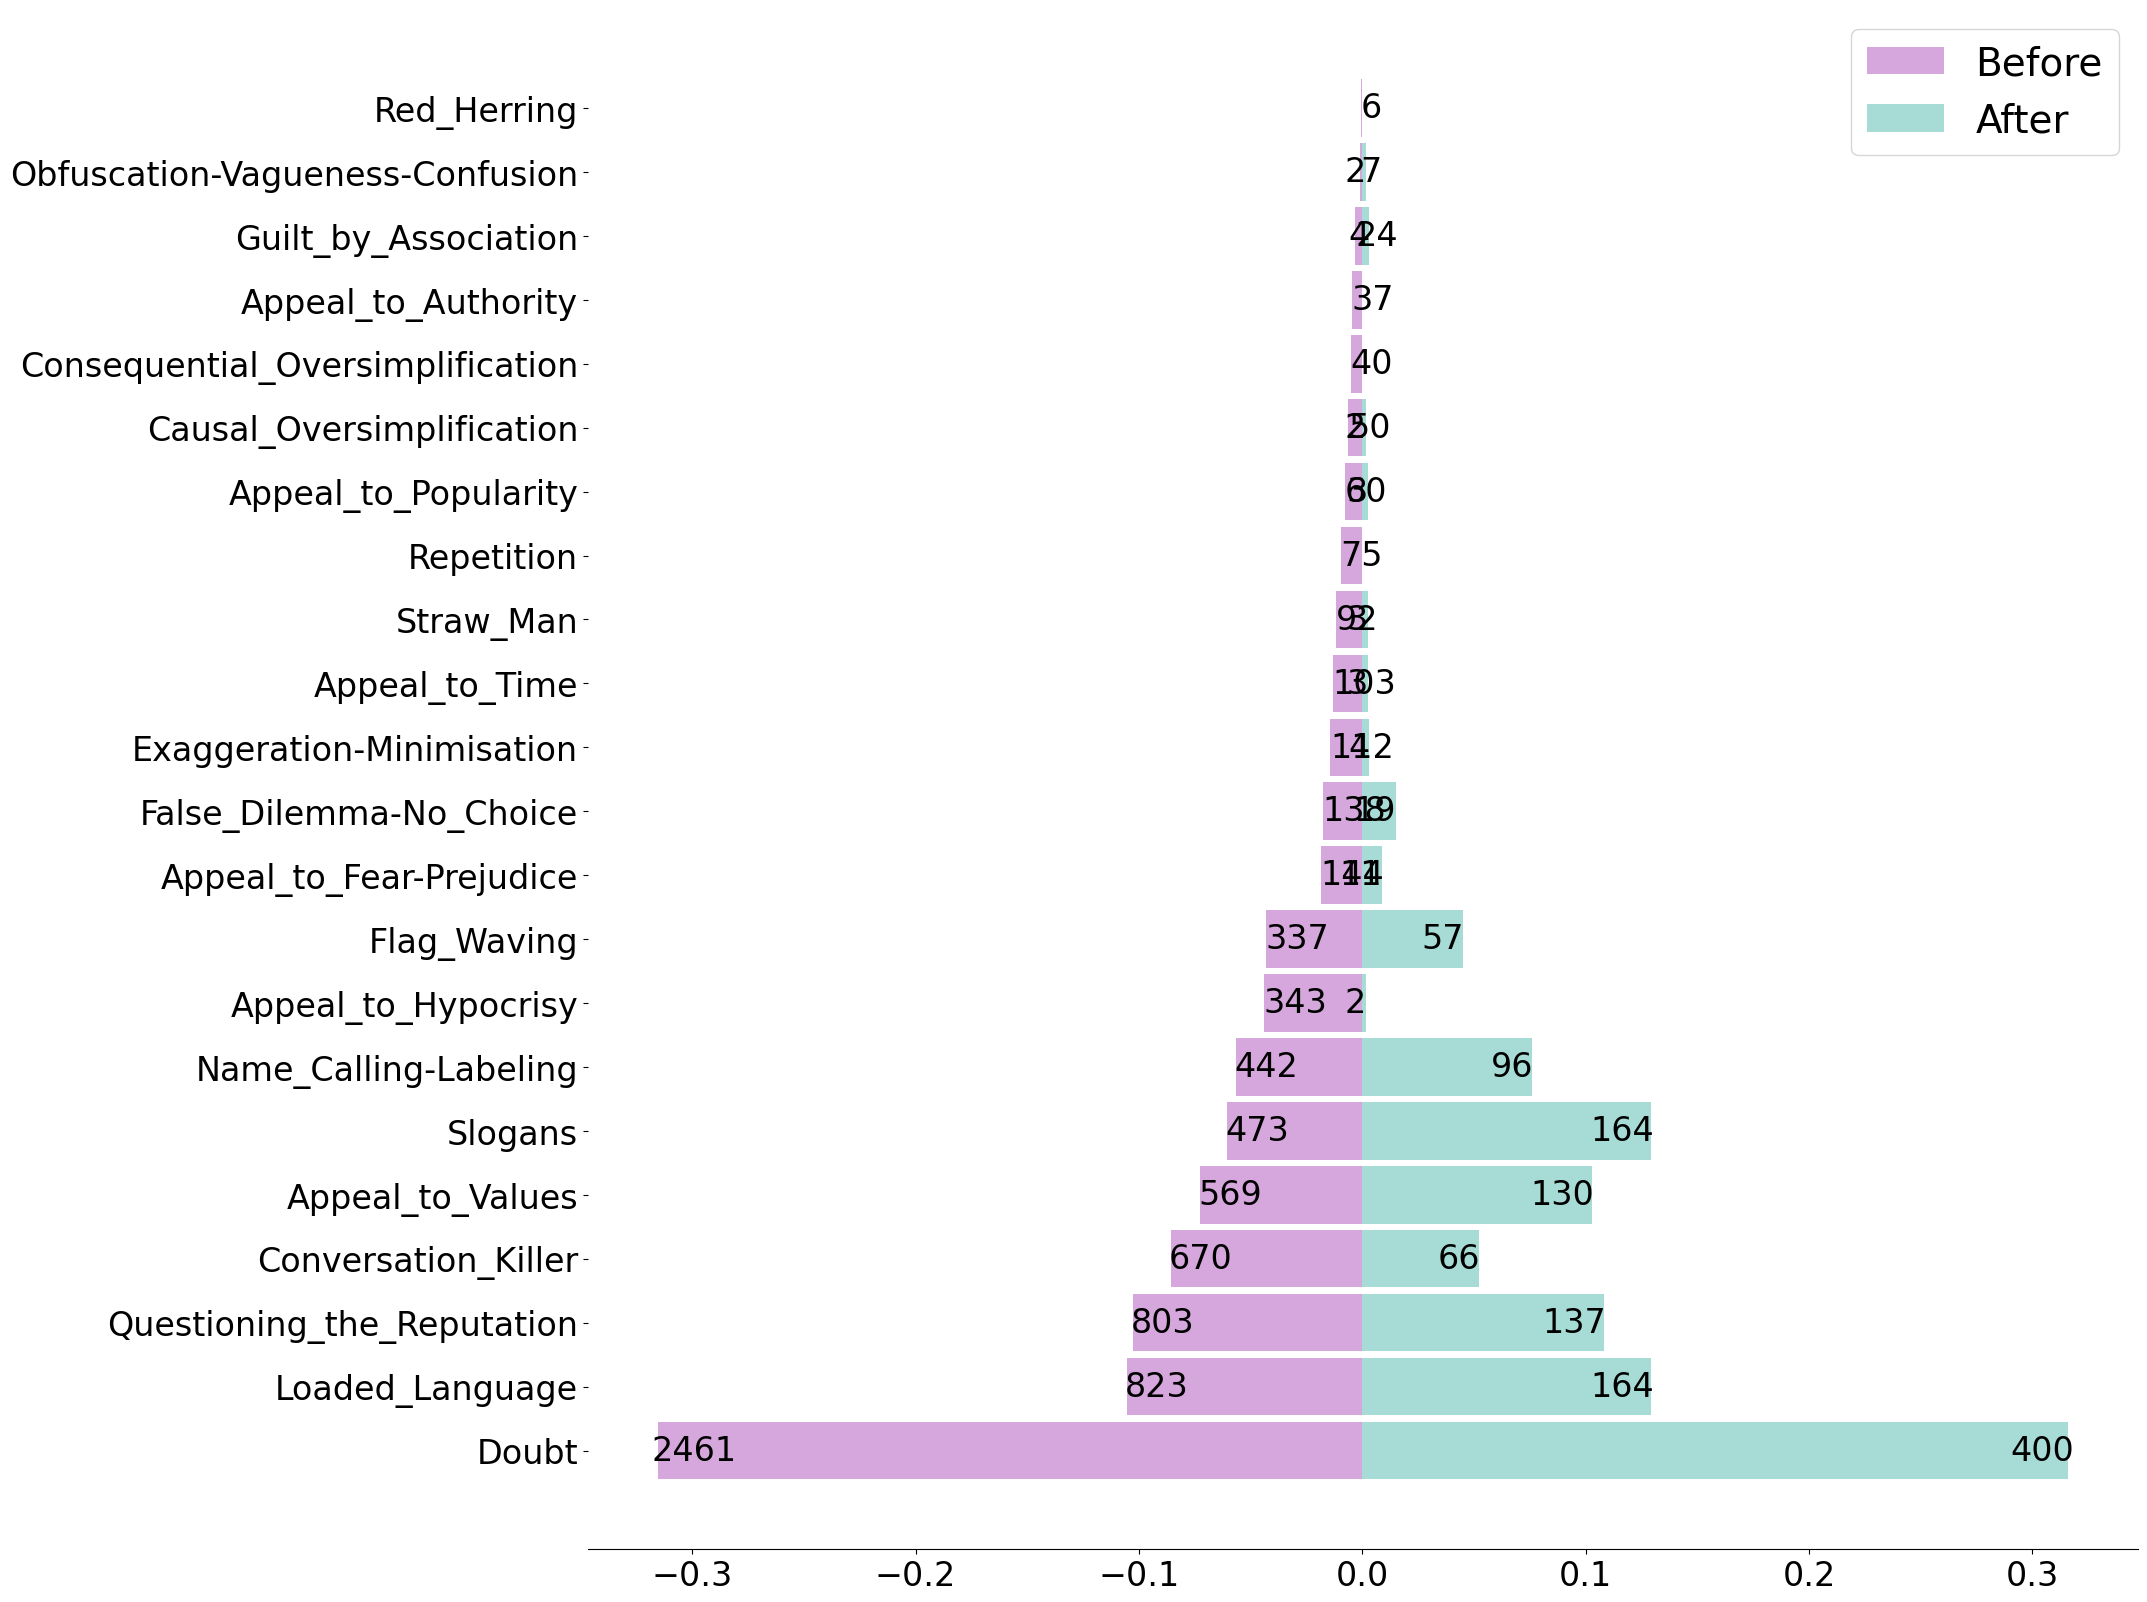

In [64]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20,20))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = '#BC6DC5'
else:
        colorpre = '#C5BC6D'

if post == "During":
        colorpost = '#C5BC6D'
else:
        colorpost = '#6DC5BC'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.6, label=pre, height=0.9)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.6, label=post, height=0.9)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=24)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=24)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# ticks size
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

plt.legend(fontsize=28)

# Display the plot
plt.show()

# Soft swing

### Before-during

In [65]:
swingtype = soft_swing
swingers_data = swingers_bd
pre = "Before"
post = "During"
groupname = "soft swingers"

In [66]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [67]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 5


In [68]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->M5s;FdI    5
Name: pattern, dtype: int64

In [69]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [70]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [71]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [72]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 1


In [73]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 1
Unique number of vulnerable users post: 1


In [74]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [84]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [75]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [86]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

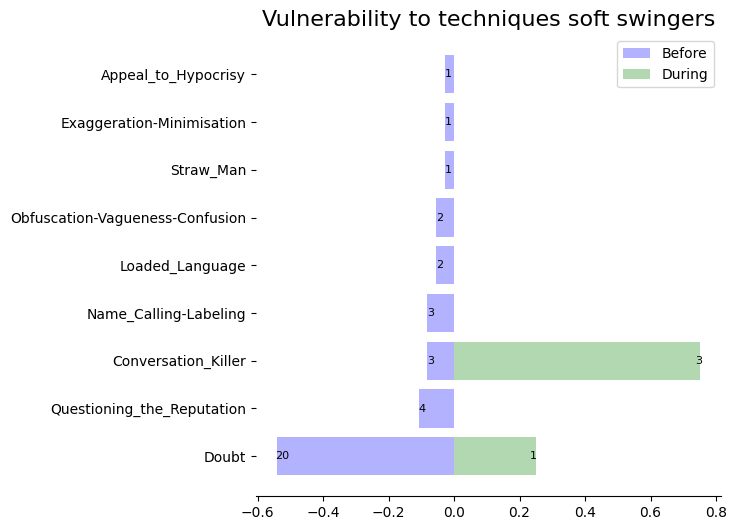

In [76]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.3, label=pre)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.3, label=post)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=8)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=8)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [77]:
swingtype = soft_swing
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "soft swingers"

In [78]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [79]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 0


### Before-after

In [80]:
swingtype = soft_swing
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "soft swingers"

In [81]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [82]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 12


In [83]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->FI;FdI    9
FI->L;FdI          2
FI->Az-Iv;FdI      1
Name: pattern, dtype: int64

In [84]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [85]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [86]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [87]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 5


In [88]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 7
Unique number of vulnerable users post: 6


In [89]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [90]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [91]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [103]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

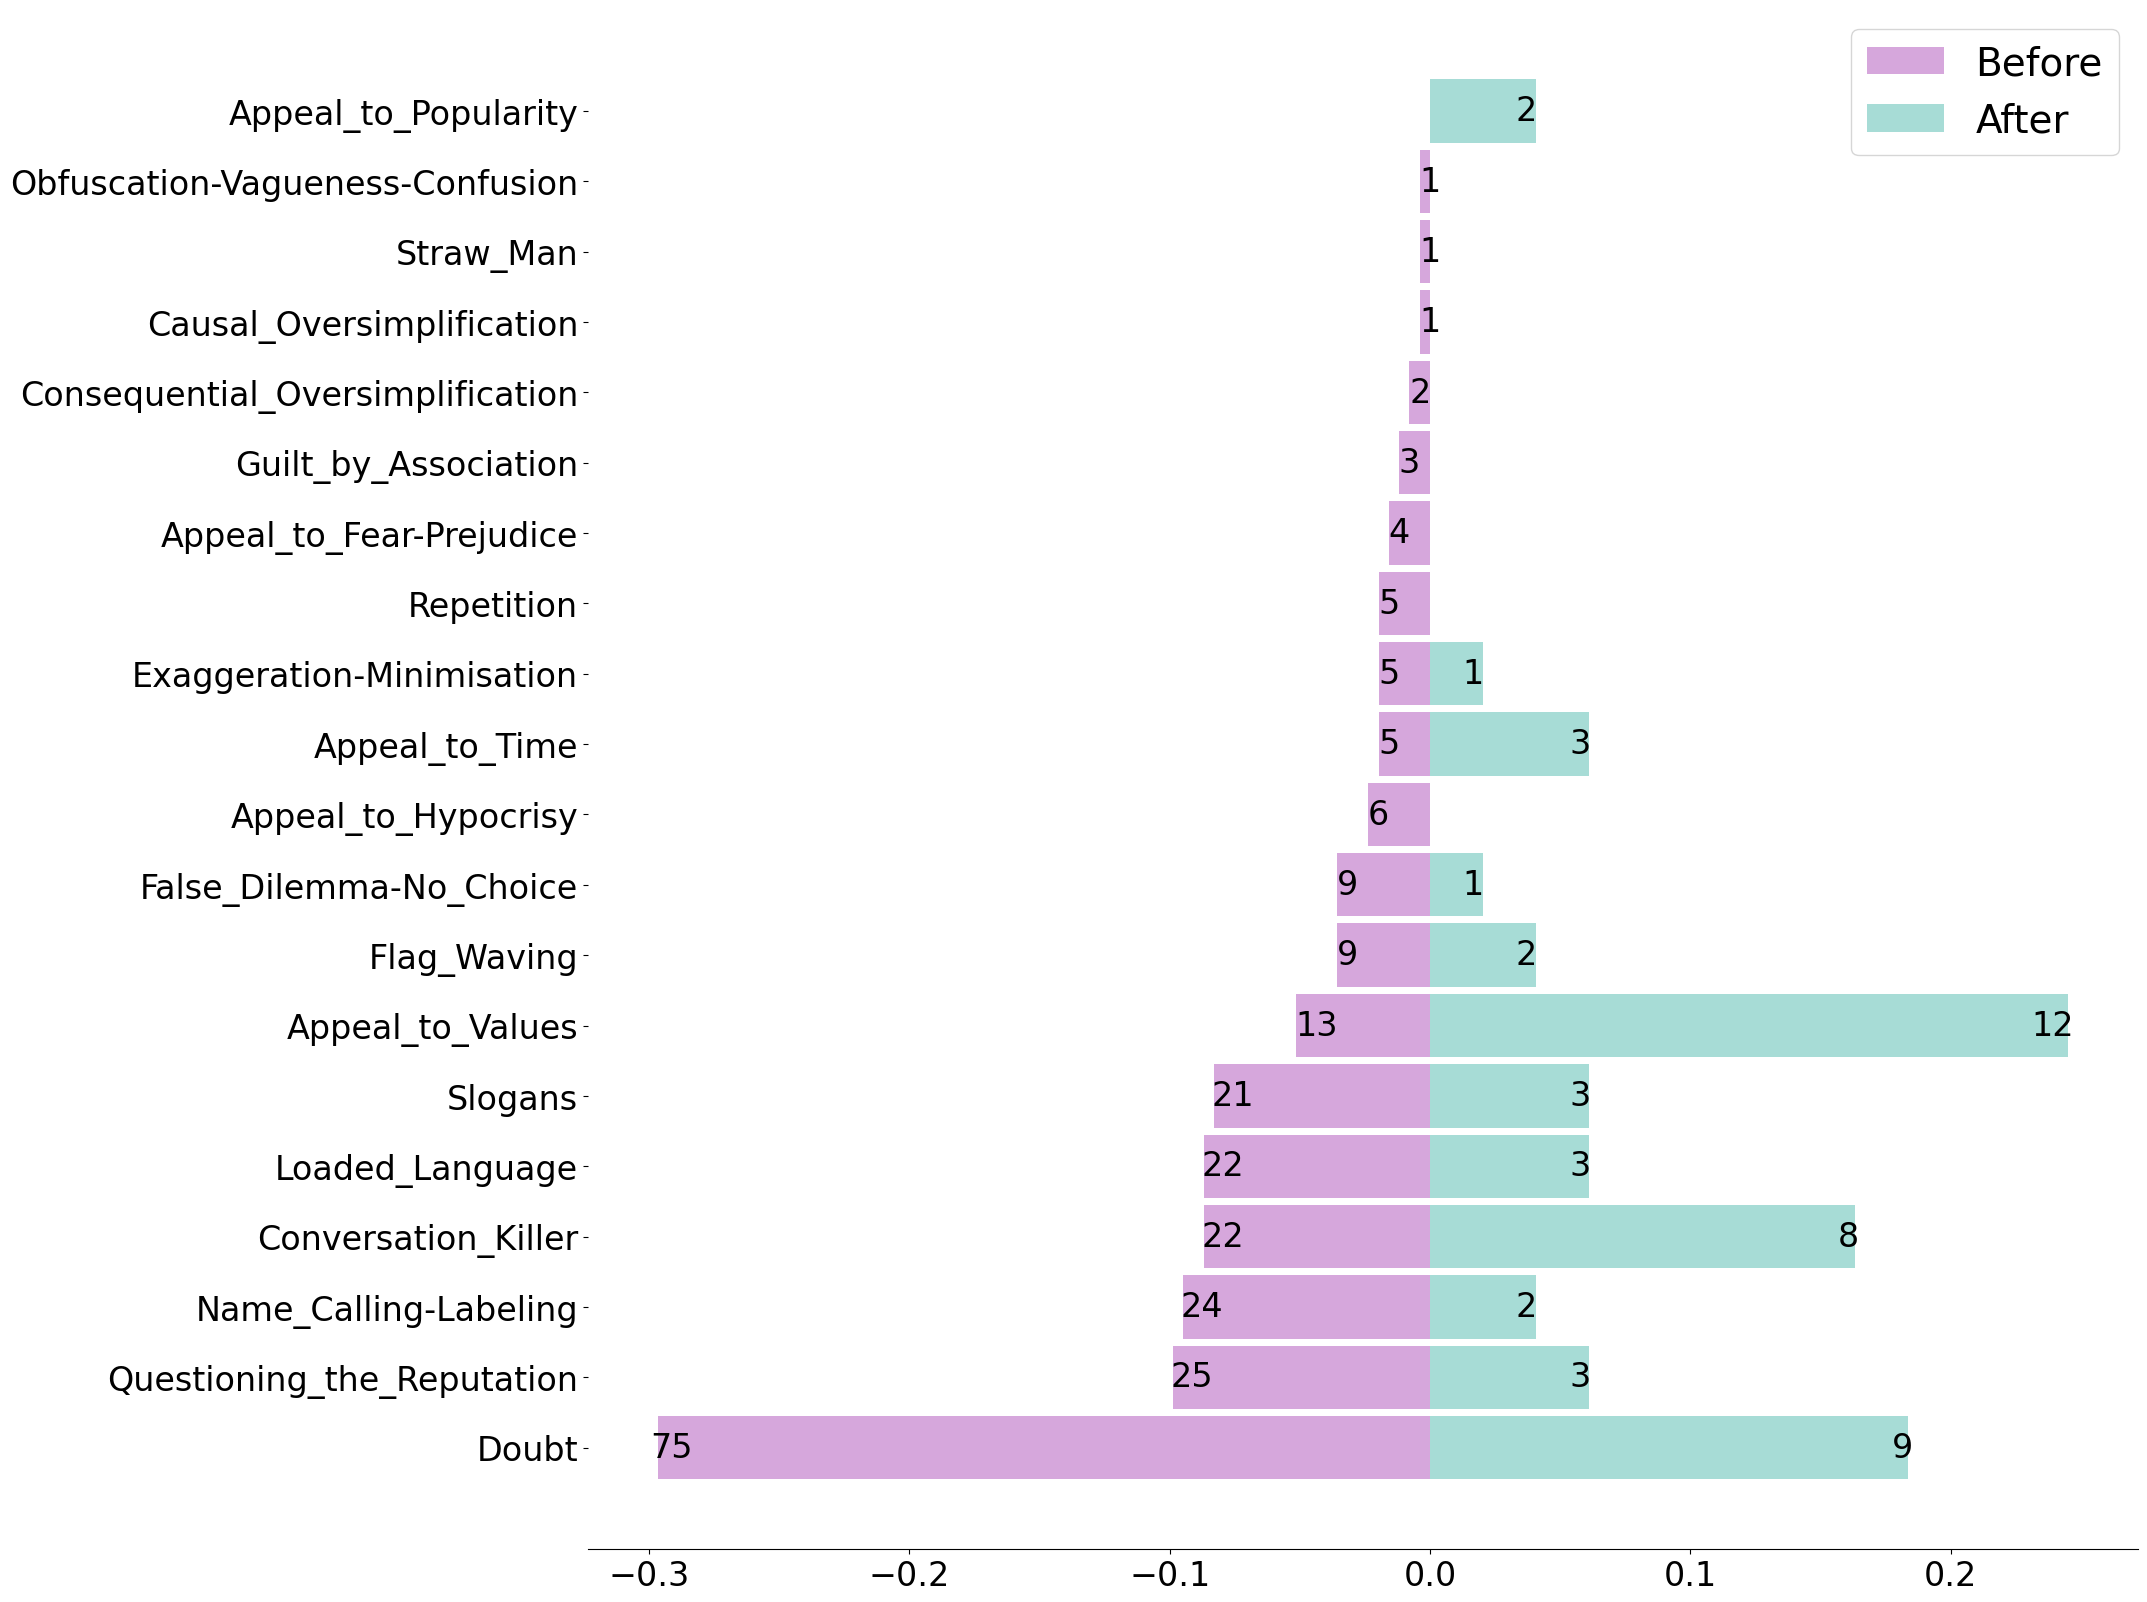

In [92]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20,20))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = '#BC6DC5'
else:
        colorpre = '#C5BC6D'

if post == "During":
        colorpost = '#C5BC6D'
else:
        colorpost = '#6DC5BC'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.6, label=pre, height=0.9)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.6, label=post, height=0.9)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=24)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=24)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# ticks size
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

plt.legend(fontsize=28)

# Display the plot
plt.show()

# Nan to party

### Before-during

In [93]:
swingtype = nantoparty
swingers_data = swingers_bd
pre = "Before"
post = "During"
groupname = "nan-to-party"

In [94]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [95]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [96]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of BD swingers that are hard swing: {len(swingers_swingtype)}")

Number of BD swingers that are hard swing: 210


In [97]:
swingers_swingtype["pattern"].value_counts()

noparty->FI;L;PD;FdI;NM    161
noparty->M5s;FdI            26
noparty->AVS;PD             12
noparty->PD                  9
noparty->Az-Iv               2
Name: pattern, dtype: int64

In [98]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [99]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [100]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [101]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 13


In [102]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 21
Unique number of vulnerable users post: 16


In [103]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [104]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [105]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [118]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

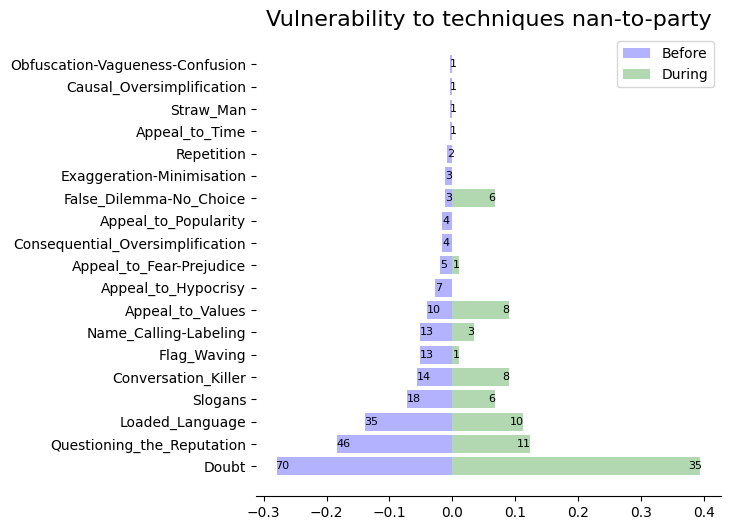

In [106]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.3, label=pre)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.3, label=post)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=8)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=8)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [107]:
swingtype = nantoparty
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "nan-to-party"

In [108]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [109]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [110]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 2110


In [111]:
swingers_swingtype["pattern"].value_counts()

noparty->L;FdI        1757
noparty->Az-Iv;FdI     110
noparty->M5s            90
noparty->AVS;PD         87
noparty->FI;FdI         46
noparty->PD;Az-Iv       19
noparty->NM;FdI          1
Name: pattern, dtype: int64

In [112]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [113]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [114]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [115]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 218


In [116]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 346
Unique number of vulnerable users post: 391


In [117]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [131]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [118]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [133]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

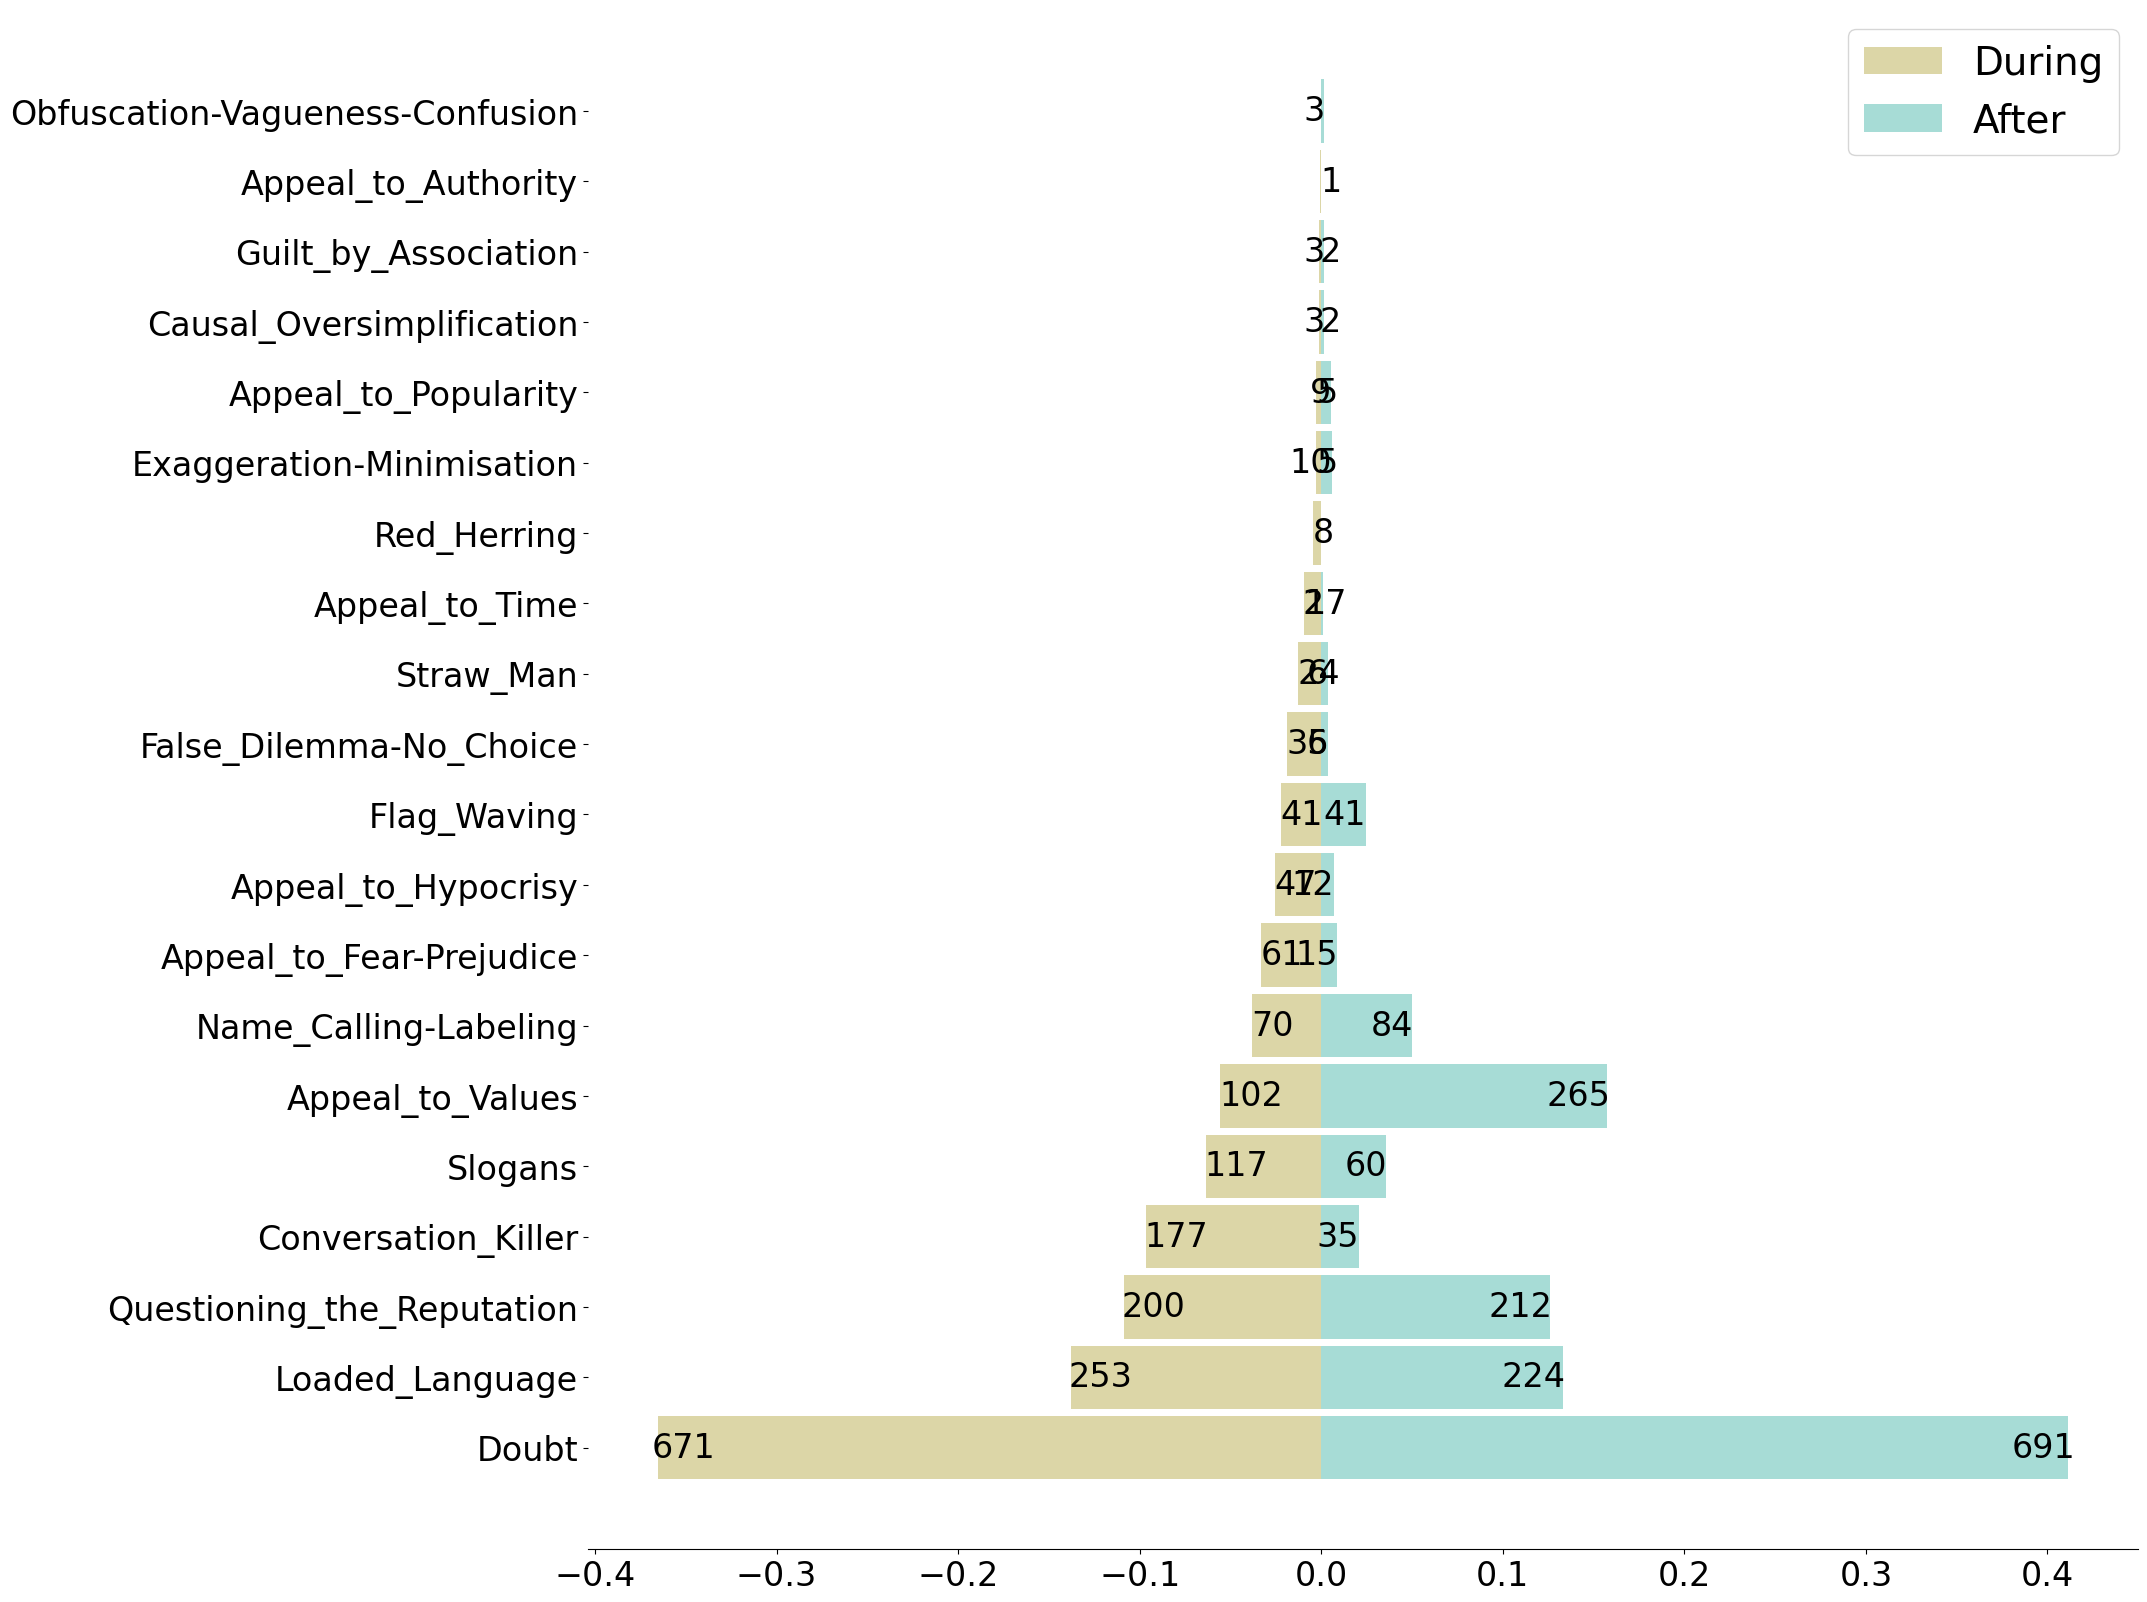

In [119]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20,20))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = '#BC6DC5'
else:
        colorpre = '#C5BC6D'

if post == "During":
        colorpost = '#C5BC6D'
else:
        colorpost = '#6DC5BC'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.6, label=pre, height=0.9)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.6, label=post, height=0.9)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=24)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=24)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# ticks size
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

plt.legend(fontsize=28)

# Display the plot
plt.show()

### Before-after

In [120]:
swingtype = nantoparty
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "nan-to-party"

In [121]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [122]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [123]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 1170


In [124]:
swingers_swingtype["pattern"].value_counts()

noparty->L;FdI        1046
noparty->Az-Iv;FdI      44
noparty->FI;FdI         30
noparty->AVS;PD         24
noparty->M5s            21
noparty->PD;Az-Iv        5
Name: pattern, dtype: int64

In [125]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [126]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [127]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [128]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 334


In [129]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 593
Unique number of vulnerable users post: 409


In [130]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [146]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [131]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [148]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

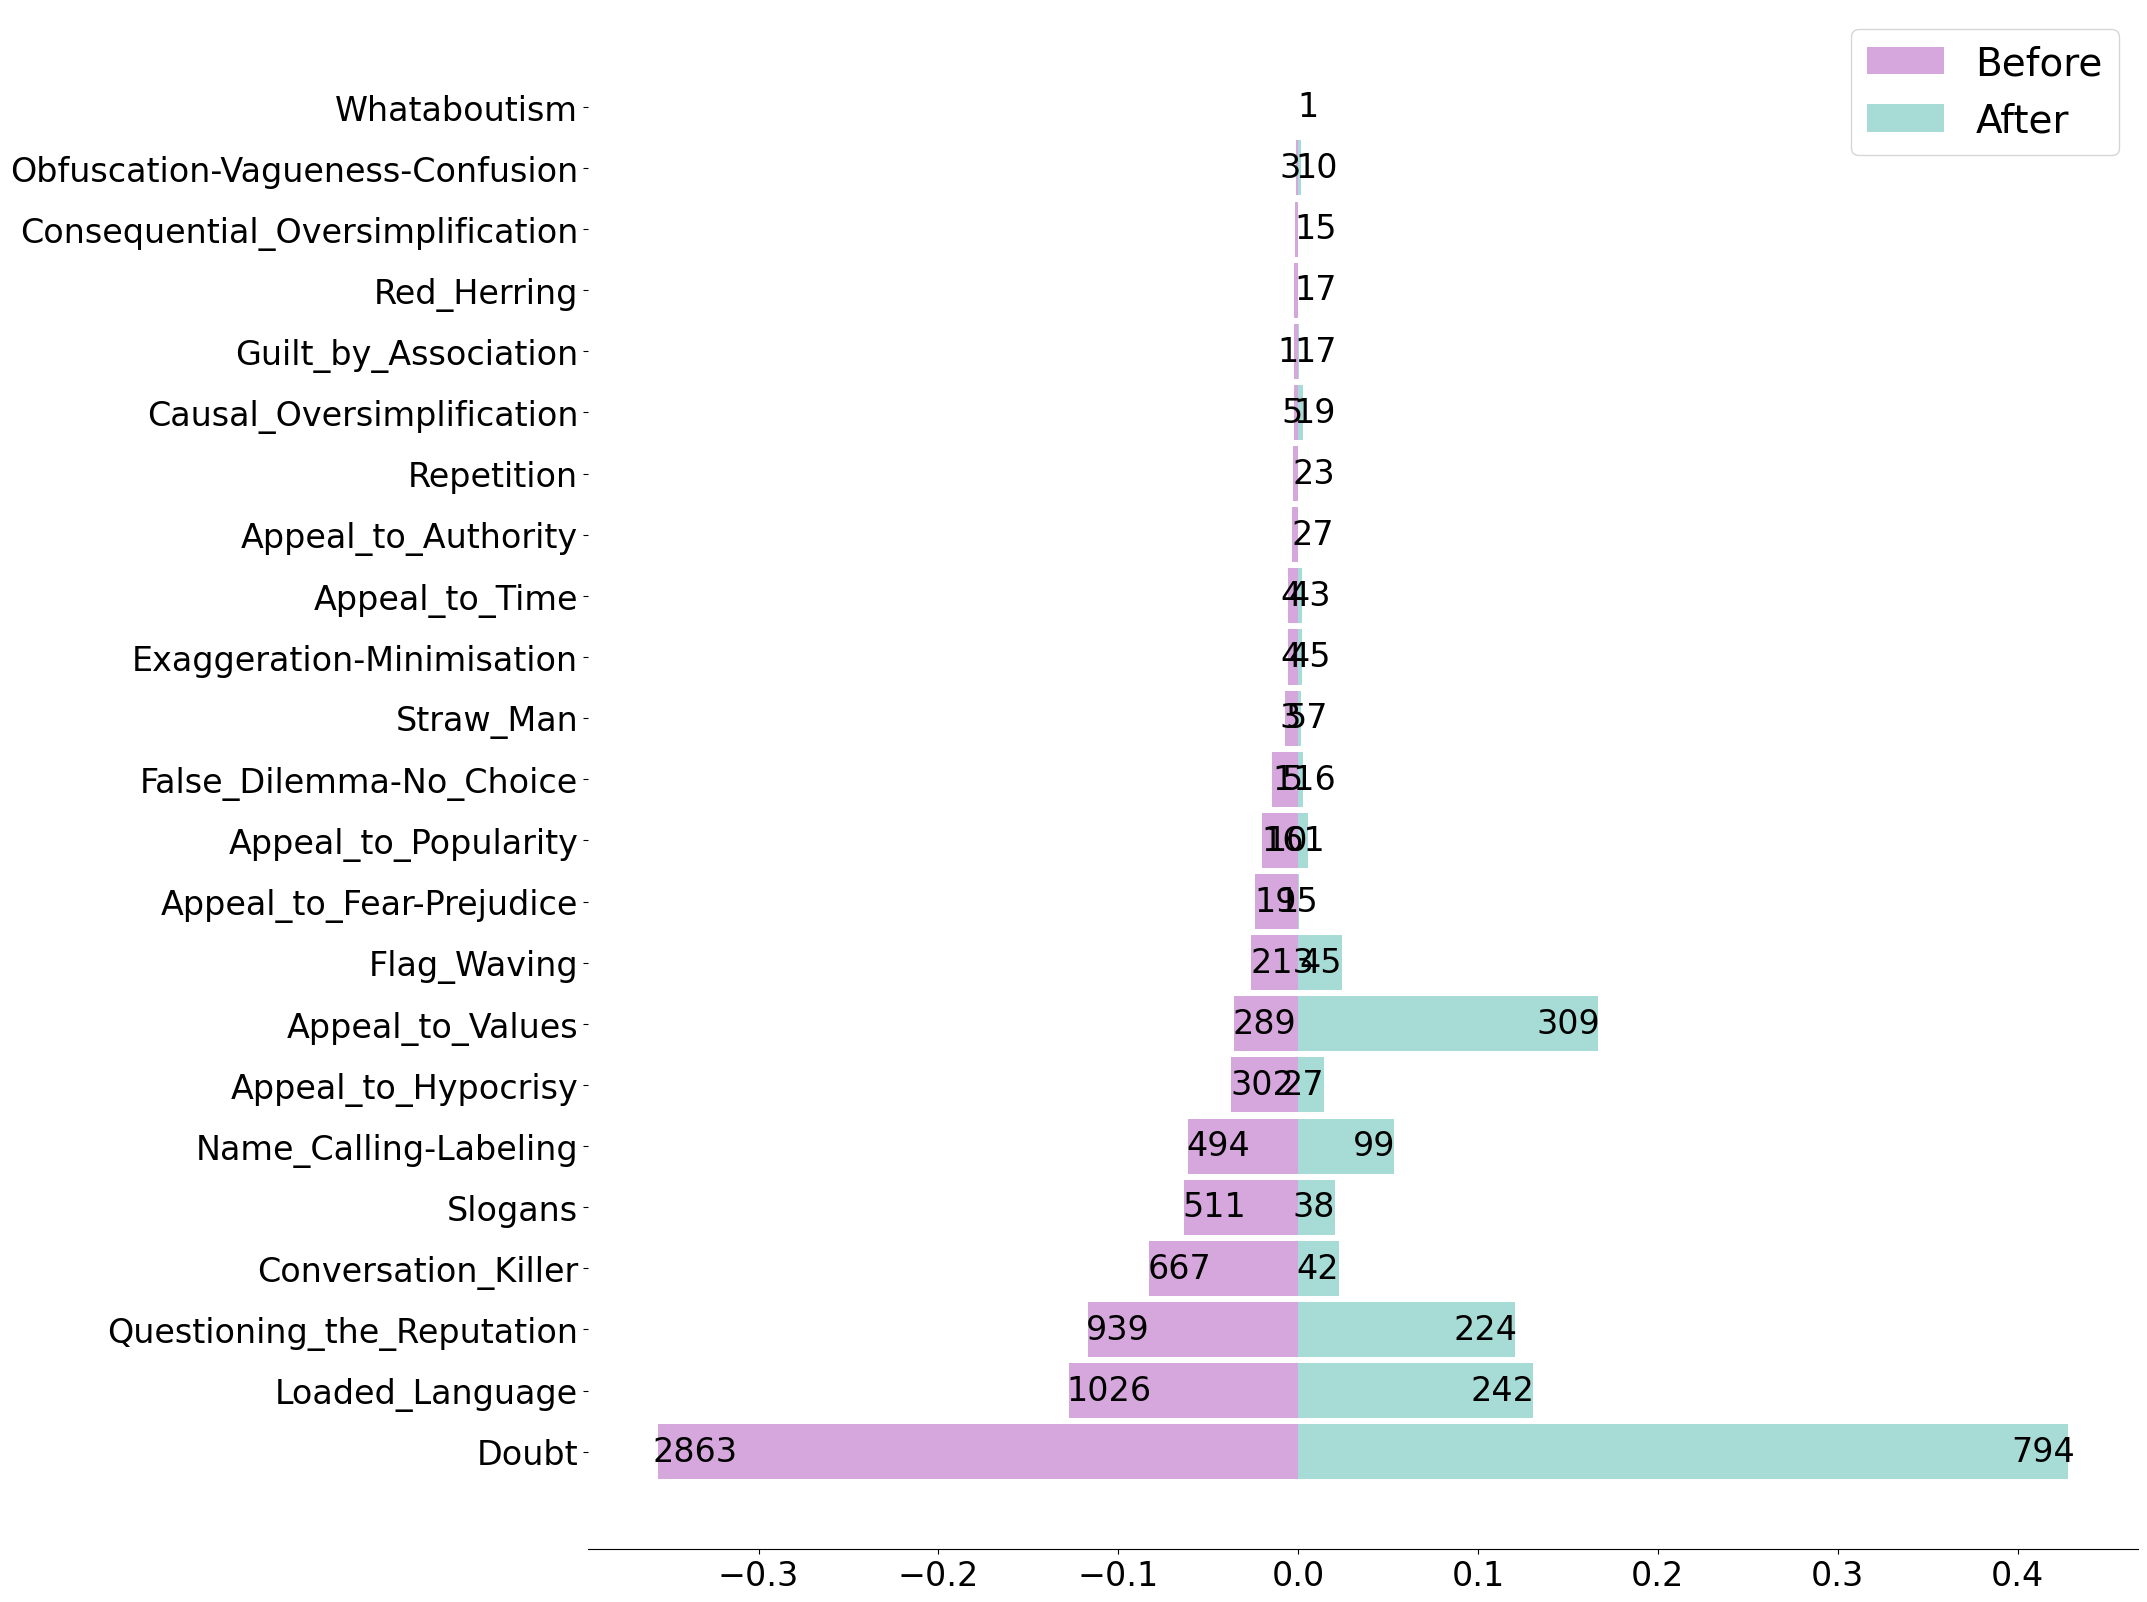

In [132]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20,20))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = '#BC6DC5'
else:
        colorpre = '#C5BC6D'

if post == "During":
        colorpost = '#C5BC6D'
else:
        colorpost = '#6DC5BC'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.6, label=pre, height=0.9)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.6, label=post, height=0.9)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=24)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=24)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# ticks size
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

plt.legend(fontsize=28)

# Display the plot
plt.show()

# Party to nan

### Before-during

In [133]:
swingtype = partytonan
swingers_data = swingers_bd
pre = "Before"
post = "During"
groupname = "party-to-nan"

In [134]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [135]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [136]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 382


In [137]:
swingers_swingtype["pattern"].value_counts()

L;FdI->noparty      191
M5s->noparty         81
AVS;PD->noparty      35
L;Az-Iv->noparty     35
FdI->noparty         34
FI->noparty           6
Name: pattern, dtype: int64

In [138]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [139]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [140]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [141]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 21


In [142]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 41
Unique number of vulnerable users post: 27


In [143]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [161]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [144]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [163]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

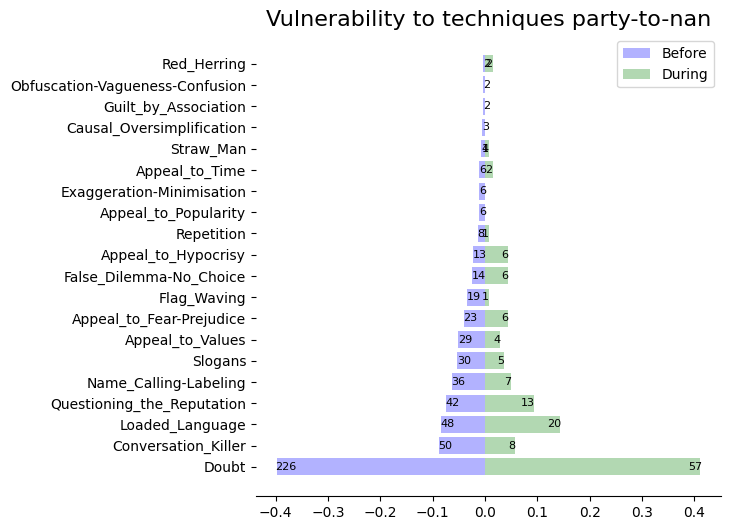

In [145]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.3, label=pre)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.3, label=post)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=8)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=8)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [146]:
swingtype = partytonan
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "party-to-nan"

In [147]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [148]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [149]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 47


In [150]:
swingers_swingtype["pattern"].value_counts()

AVS;PD->noparty            22
M5s;FdI->noparty            8
PD->noparty                 8
FI;L;PD;FdI;NM->noparty     6
Az-Iv->noparty              3
Name: pattern, dtype: int64

In [151]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [152]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [153]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [154]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 7


In [155]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 8
Unique number of vulnerable users post: 11


In [156]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [176]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [157]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [178]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

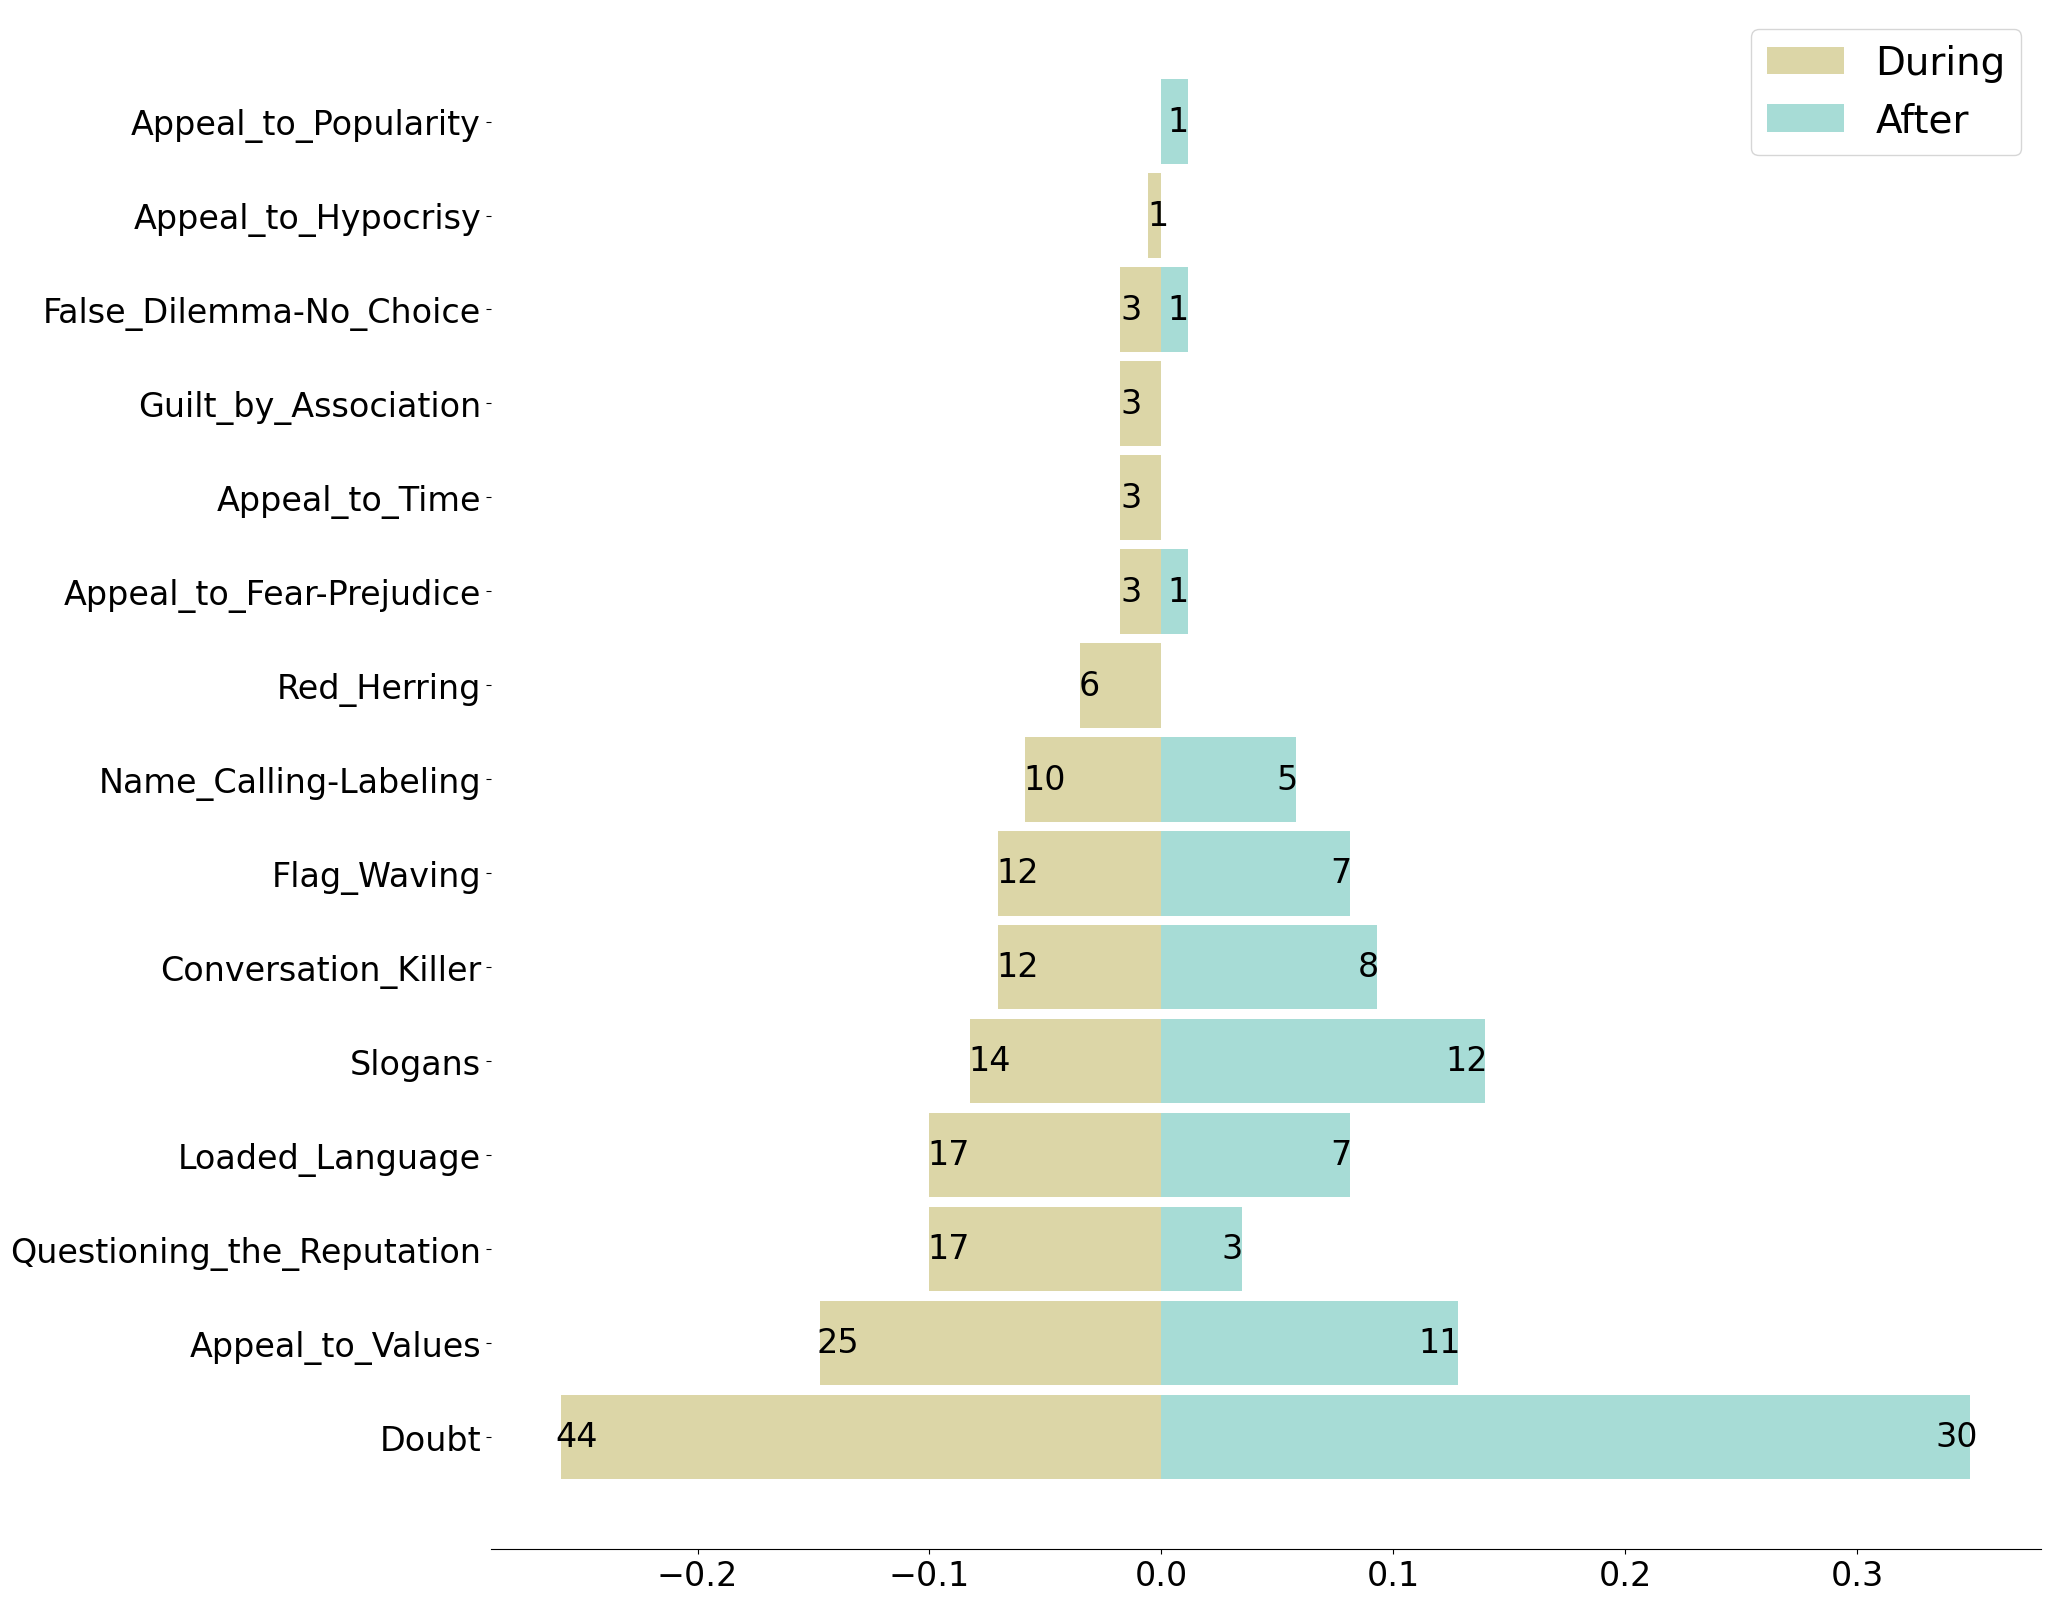

In [158]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20,20))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = '#BC6DC5'
else:
        colorpre = '#C5BC6D'

if post == "During":
        colorpost = '#C5BC6D'
else:
        colorpost = '#6DC5BC'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.6, label=pre, height=0.9)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.6, label=post, height=0.9)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=24)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=24)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# ticks size
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

plt.legend(fontsize=28)

# Display the plot
plt.show()

### Before-after

In [159]:
swingtype = partytonan
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "party-to-nan"

In [160]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [161]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [162]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 50


In [163]:
swingers_swingtype["pattern"].value_counts()

AVS;PD->noparty     17
M5s->noparty        11
L;FdI->noparty       9
FdI->noparty         5
FI->noparty          5
L;Az-Iv->noparty     3
Name: pattern, dtype: int64

In [164]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [165]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [166]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [167]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 10


In [168]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 16
Unique number of vulnerable users post: 16


In [169]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [191]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [170]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [193]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

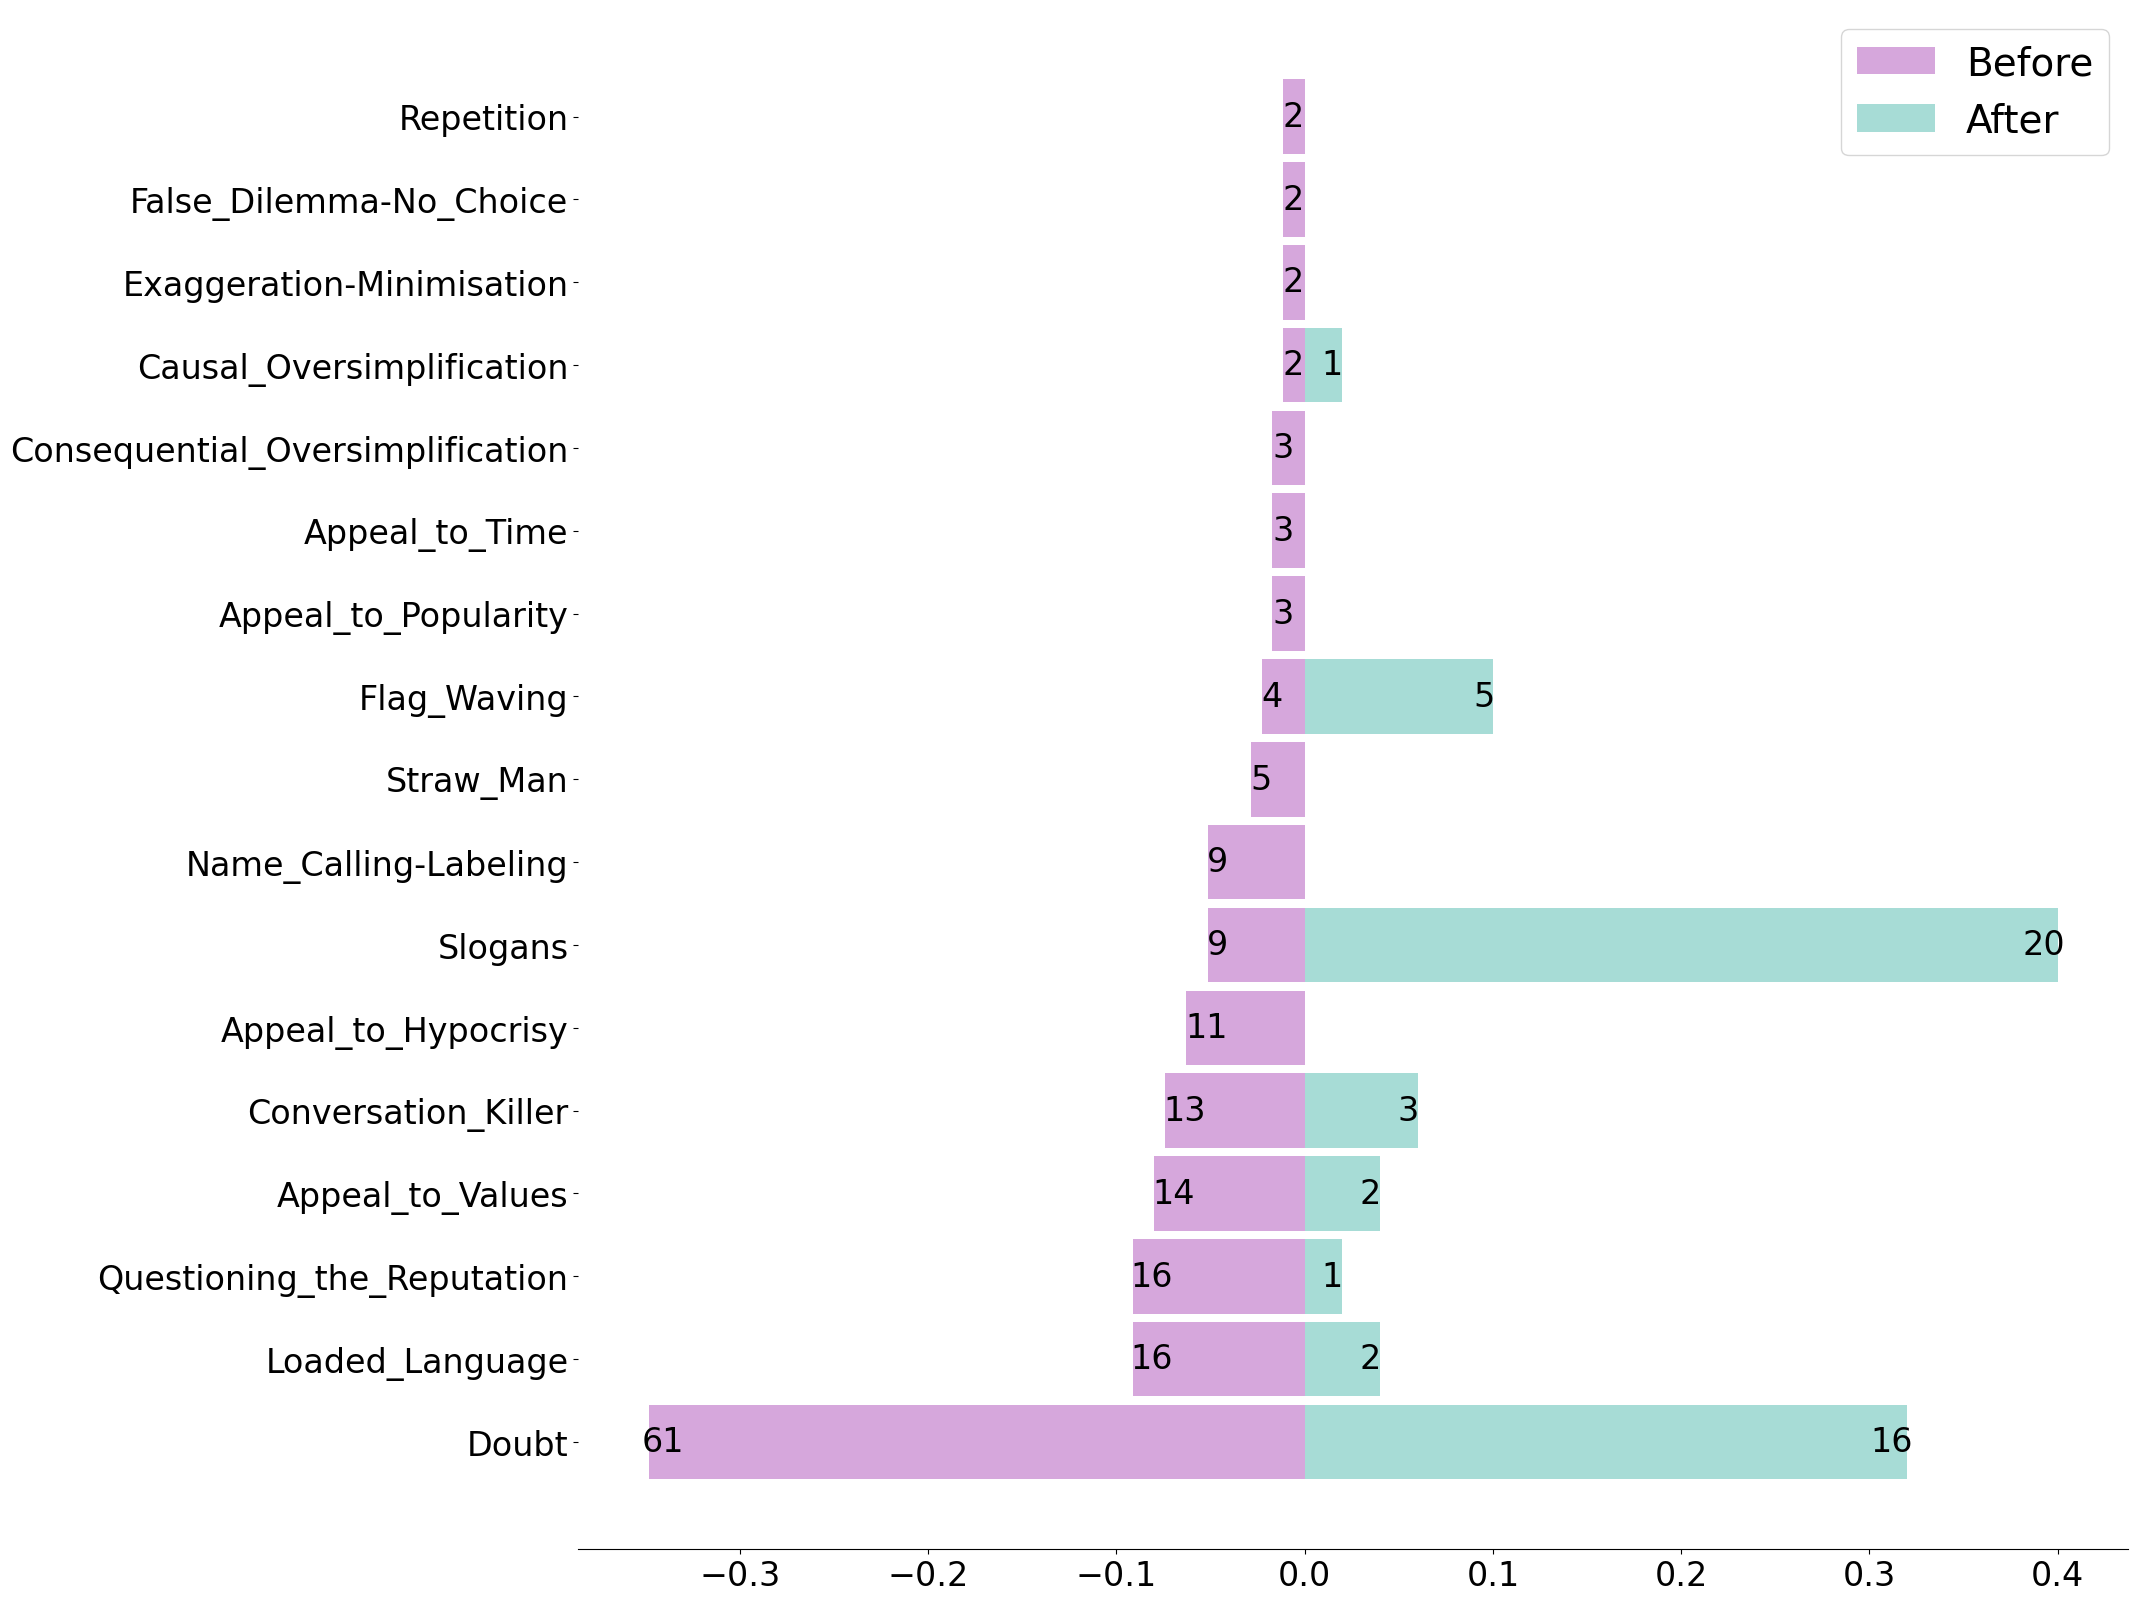

In [171]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20,20))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = '#BC6DC5'
else:
        colorpre = '#C5BC6D'

if post == "During":
        colorpost = '#C5BC6D'
else:
        colorpost = '#6DC5BC'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.6, label=pre, height=0.9)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.6, label=post, height=0.9)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=24)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=24)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# ticks size
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

plt.legend(fontsize=28)

# Display the plot
plt.show()

# No real swing

### Before-after

In [172]:
swingtype = norealswing
swingers_data = swingers_ba
pre = "Before"
post = "After"
groupname = "no real swing"

In [173]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [174]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [175]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 1957


In [176]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->PD;Az-Iv     1313
L;FdI->FI;FdI          283
FdI->Az-Iv;FdI         122
L;Az-Iv->Az-Iv;FdI      75
AVS;PD->PD;Az-Iv        55
L;FdI->Az-Iv;FdI        37
FI->FI;FdI              33
FdI->FI;FdI             15
FdI->L;FdI              11
L;Az-Iv->L;FdI           8
L;FdI->NM;FdI            5
Name: pattern, dtype: int64

In [177]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [178]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [179]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [180]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 1442


In [181]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 1667
Unique number of vulnerable users post: 1492


In [182]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [206]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [183]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [208]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

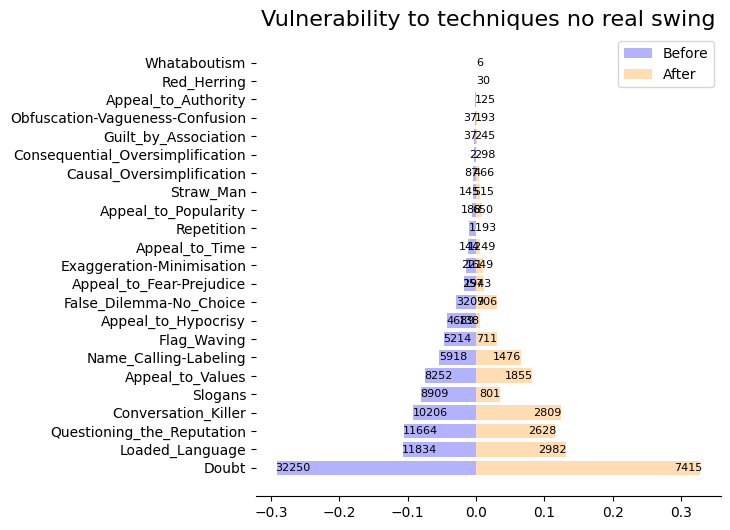

In [184]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.3, label=pre)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.3, label=post)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=8)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=8)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### Before-during

In [185]:
swingtype = norealswing
swingers_data = swingers_bd
pre = "Before"
post = "During"
groupname = "no real swing"

In [186]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [187]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [188]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 4151


In [189]:
swingers_swingtype["pattern"].value_counts()

L;Az-Iv->Az-Iv             1808
M5s->M5s;FdI               1320
L;FdI->FI;L;PD;FdI;NM       914
FI->FI;L;PD;FdI;NM           46
FdI->FI;L;PD;FdI;NM          19
FdI->M5s;FdI                 15
AVS;PD->PD                   13
L;Az-Iv->FI;L;PD;FdI;NM       9
AVS;PD->FI;L;PD;FdI;NM        5
L;FdI->M5s;FdI                2
Name: pattern, dtype: int64

In [190]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [191]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [192]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [193]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 496


In [194]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 665
Unique number of vulnerable users post: 543


In [195]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [221]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [196]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [223]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

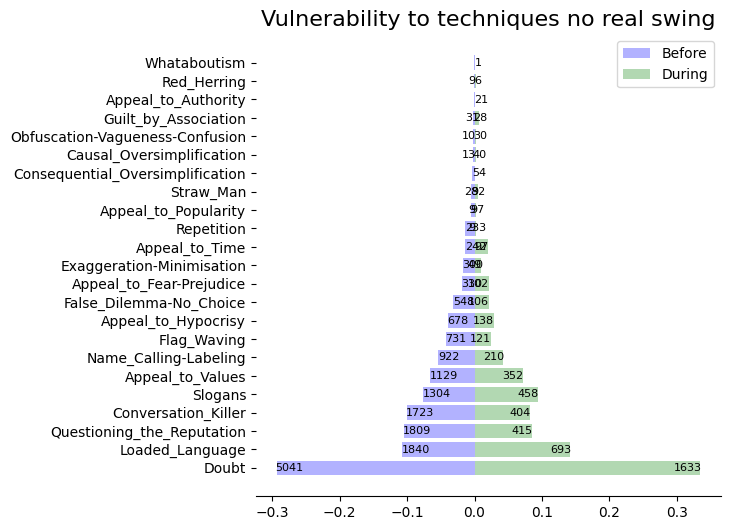

In [197]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(6, 6))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = 'blue'
else:
        colorpre = 'green'

if post == "During":
        colorpost = 'green'
else:
        colorpost = 'darkorange'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.3, label=pre)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.3, label=post)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=8)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=8)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# Add a title
ax.set_title('Vulnerability to techniques '+groupname, fontsize=16)

plt.legend()

# Display the plot
plt.show()

### During-after

In [198]:
swingtype = norealswing
swingers_data = swingers_da
pre = "During"
post = "After"
groupname = "no real swing"

In [199]:
# replace "NaN" with "noparty" in swingers_data
swingers_data["party1"] = swingers_data["party1"].fillna("noparty").astype(str)
swingers_data["party2"] = swingers_data["party2"].fillna("noparty").astype(str)

In [200]:
swingtype["pattern"] = swingtype["party1"] + "->" + swingtype["party2"]
swingers_data["pattern"] = swingers_data["party1"] + "->" + swingers_data["party2"]

In [201]:
# subset swingers_bd with patterns that are in hard_swing
swingers_swingtype = swingers_data[swingers_data["pattern"].isin(swingtype["pattern"])]
print(f"Number of swingers: {len(swingers_swingtype)}")

Number of swingers: 5524


In [202]:
swingers_swingtype["pattern"].value_counts()

Az-Iv->PD;Az-Iv              1877
M5s;FdI->M5s                 1551
FI;L;PD;FdI;NM->L;FdI         898
FI;L;PD;FdI;NM->FI;FdI        673
Az-Iv->Az-Iv;FdI              103
AVS;PD->PD;Az-Iv               96
M5s;FdI->Az-Iv;FdI             92
PD->AVS;PD                     91
FI;L;PD;FdI;NM->Az-Iv;FdI      42
FI;L;PD;FdI;NM->AVS;PD         24
M5s;FdI->L;FdI                 24
FI;L;PD;FdI;NM->PD;Az-Iv       20
FI;L;PD;FdI;NM->NM;FdI         17
PD->PD;Az-Iv                    8
M5s;FdI->FI;FdI                 5
M5s;FdI->FdI                    2
M5s;FdI->NM;FdI                 1
Name: pattern, dtype: int64

In [203]:
swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)

/var/folders/86/bg7l26m97pj650k3d91z7mpc0000gn/T/ipykernel_79474/1889862421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swingers_swingtype["user"] = swingers_swingtype["user"].astype(str)


Most retweeted techniques, comparison before and during

In [204]:
# within the swingers before-during, find those that retweet a propaganda tweet before
vulnerable_pre = []

count = 0
for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                count += 1
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_pre.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] < start_during and user[0] in swingers_swingtype["user"].values:
                 vulnerable_pre.append([user[0], tweet])

In [205]:
vulnerable_post = []

for tweet in vulnerable_swingers:

    for user in vulnerable_swingers[tweet]:
        if len(swingers_data) == len(swingers_bd):
            if user[1]=="BD" and user[2] >= start_during and user[2] < start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_da):
            if user[1]=="DA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                vulnerable_post.append([user[0], tweet])
        elif len(swingers_data) == len(swingers_ba):
            if user[1]=="BA" and user[2] >= start_after and user[0] in swingers_swingtype["user"].values:
                 vulnerable_post.append([user[0], tweet])

In [206]:
# check whether vulnerable users are the same in bd_vulnerable_before and bd_vulnerable_during
vulnerable_pre_users = [x[0] for x in vulnerable_pre]
vulnerable_post_users = [x[0] for x in vulnerable_post]

# intersection
vulnerable_pre_users_users_set = set(vulnerable_pre_users)
vulnerable_post_users_set = set(vulnerable_post_users)

intersection = vulnerable_pre_users_users_set.intersection(vulnerable_post_users_set)
print(f"Number of swingers that retweet propaganda both prior and after swinging: {len(intersection)}")

Number of swingers that retweet propaganda both prior and after swinging: 1830


In [207]:
print("Unique number of vulnerable users prior:", len(set([x[0] for x in vulnerable_pre])))
print("Unique number of vulnerable users post:", len(set([x[0] for x in vulnerable_post])))

Unique number of vulnerable users prior: 2128
Unique number of vulnerable users post: 2245


In [208]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_prior_annotations = []
for user in vulnerable_pre:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_prior_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [236]:
#vulnerable_prior_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_prior_annotations]

In [209]:
# match second element of sublists in bd_vulnerable_before with the annotations in propaganda_tweets
vulnerable_post_annotations = []
for user in vulnerable_post:
    for tweet in propaganda_tweets:
        if user[1] == tweet:
            if "annotations" in propaganda_tweets[tweet]:
                vulnerable_post_annotations.append([user[0], [sub["label"] for sub in propaganda_tweets[tweet]['annotations']]])

In [238]:
#vulnerable_post_annotations = [[x[0], list(set(x[1]))] for x in vulnerable_post_annotations]

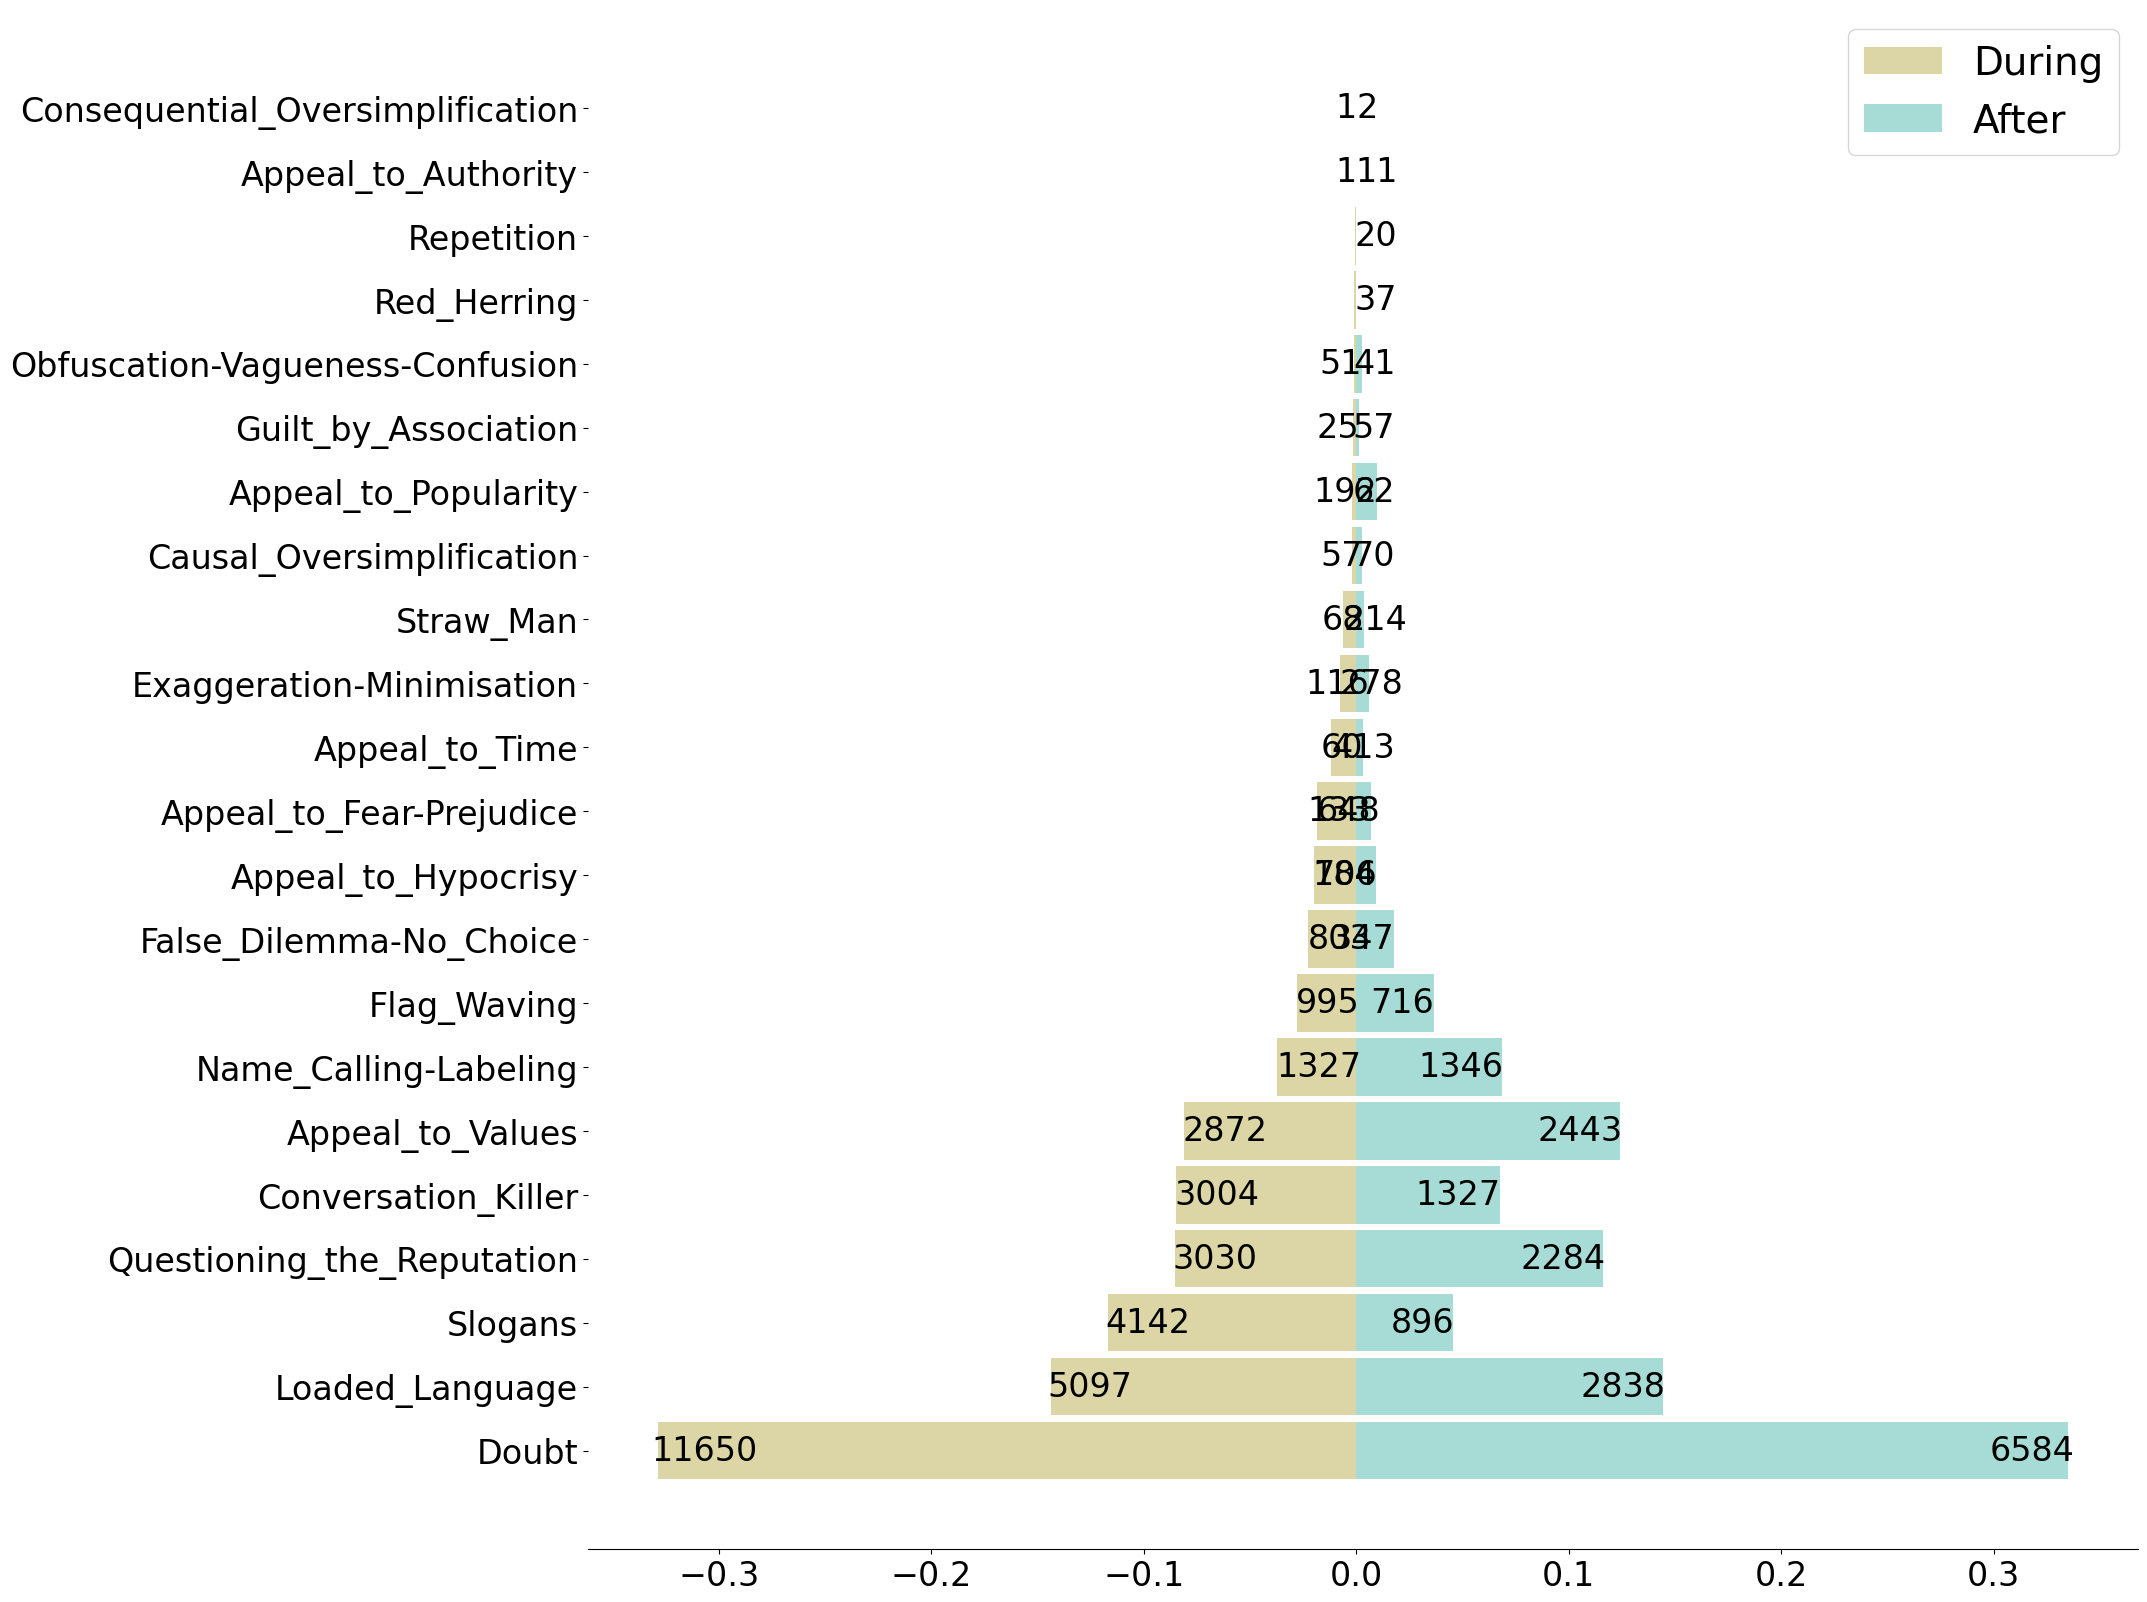

In [210]:
# Create a figure and axis with a specific size
fig, ax = plt.subplots(figsize=(20,20))

vulnerable_prior_labels = [label for sublist in vulnerable_prior_annotations for label in sublist[1]]
vulnerable_prior_labels_count = pd.Series(vulnerable_prior_labels).value_counts()
perc_vulnerable_prior_labels = vulnerable_prior_labels_count/pd.Series(vulnerable_prior_labels).count()

# explode the list of labels and count the occurrences
vulnerable_post_labels = [label for sublist in vulnerable_post_annotations for label in sublist[1]]
vulnerable_post_labels_count = pd.Series(vulnerable_post_labels).value_counts()
perc_vulnerable_post_labels = vulnerable_post_labels_count/pd.Series(vulnerable_post_labels).count()

if pre == "Before":
        colorpre = '#BC6DC5'
else:
        colorpre = '#C5BC6D'

if post == "During":
        colorpost = '#C5BC6D'
else:
        colorpost = '#6DC5BC'



# Create both barplots
pre_bars = ax.barh(perc_vulnerable_prior_labels.index, -perc_vulnerable_prior_labels,
        color=colorpre, alpha=0.6, label=pre, height=0.9)
post_bars = ax.barh(perc_vulnerable_post_labels.index, perc_vulnerable_post_labels,
        color=colorpost, alpha=0.6, label=post, height=0.9)


# Add annotations at the end of each bar
for bar, annotations in zip(pre_bars, vulnerable_prior_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='left', color='black', fontsize=24)

for bar, annotations in zip(post_bars, vulnerable_post_labels_count):
        ax.text(bar.get_width() * 1.01, bar.get_y() + bar.get_height() / 2, f'{annotations}',
                va='center', ha='right', color='black', fontsize=24)


# Removes spines
ax.spines[['right', 'top', 'left']].set_visible(False)

# ticks size
ax.tick_params(axis='y', labelsize=24)
ax.tick_params(axis='x', labelsize=24)

plt.legend(fontsize=28)

# Display the plot
plt.show()